In [10]:

from pandas import * 
import os   
import sys 
import numpy
import fileinput
import matplotlib.pyplot as plt 
import matplotlib.ticker  
import matplotlib.dates
from matplotlib.ticker import FormatStrFormatter 
import pandas.io.sql
import pyodbc 
import datetime
from matplotlib.pyplot import figure, show
from matplotlib.patches import Ellipse
#import matplotlib as mpl
#from matplotlib import *
import numpy as np
from pandas import *
#import ea_colours 
#from ea_colours import *
import EAtools as ea
ea.set_options()
ea.ea_report_style()
#from matplotlib import rc
from pylab import *
#conHH = pyodbc.connect('DRIVER={SQL Server Native Client 10.0};SERVER=eadwprod\live;DATABASE=HH;UID='+userID+';PWD='+password)

In [11]:
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
ea_p=ea.ea_p
ea_s=ea.ea_s

plt.rcParams['xtick.major.size'] = 0
plt.rcParams['xtick.major.width'] = 0
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.major.size'] = 0
plt.rcParams['ytick.major.width'] = 0
plt.rcParams['ytick.minor.size'] = 0
plt.rcParams['ytick.minor.width'] = 0
plt.rcParams['xtick.major.pad']=5
plt.rcParams['ytick.major.pad']=5
mpl.rcParams['figure.subplot.bottom']=0.25
matplotlib.rcParams['axes.color_cycle'] = ea_p['bl1'], ea_p['gy1'],ea_p['rd1'],ea_s['yl1'],ea_s['og1'], ea_s['bl2'], ea_s['rd2']
x=0.14
y=0.86

mpl.rcParams['figure.subplot.left']=x
mpl.rcParams['figure.subplot.right']=y

matplotlib.rc("font", **{"sans-serif": ["Arial"], "size": 7, 'style':'normal', 'family':'sans'})
plt.rcParams['font.weight'] = 500
ea.set_options()
ea.ea_report_style()

def cm2inch(value):
    return value/2.54
path='/media/usb/notebooks/Doug/'
%pylab inline
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['power', 'random', 'info', 'linalg', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [12]:
existgenRCPD= read_csv('exist_g_rcpd.csv',parse_dates=True, na_values='NaN')

existgenAoB= read_csv('exist_g_aob.csv',parse_dates=True, na_values='NaN')
CAT={'CCGT':'thermal',
 'Coal':'thermal',
 'DslPkr':'thermal',
 'GasCog':'thermal',
 'GasPkr':'thermal',
 'Geo':'Geo',
 'HydPK':'hydro',
 'HydRR':'hydro',
 'HydSC':'hydro',
 'OCGT':'thermal',
 'Wind':'wind'}
existgenRCPD['fuel']=existgenRCPD['tech'].map(CAT)
existgenAoB['fuel']=existgenAoB['tech'].map(CAT)
# Adv['Date']=pandas.to_datetime(Adv.Date, dayfirst=True, format="%m/%d/%Y" )
# existgenRCPD=existgenRCPD[(existgenRCPD.existing==1)]
# existgenAoB=existgenAoB[(existgenAoB.existing==1)]




# Adv.fillna(0, inplace=True)

In [13]:
existgenRCPD.set_index([ 'm_yr', 'fuel'], inplace=True)
existgenAoB.set_index([ 'm_yr', 'fuel'], inplace=True)


groupedRCPD=existgenRCPD.groupby(level=[0,1]).sum()
groupedAoB=existgenAoB.groupby(level=[0,1]).sum()

In [14]:
#existgenRCPD
RCPDsumpk=existgenRCPD[existgenRCPD.index.get_level_values('m_yr').isin(['2045'])].pk_mw.sum()
AoBsumpkmw=existgenAoB[existgenAoB.index.get_level_values('m_yr').isin(['2045'])].pk_mw.sum()
print(RCPDsumpk)
print(AoBsumpkmw)
print(AoBsumpkmw-RCPDsumpk)

7804.43
8369.43
565.0


In [15]:
existgenAoB[existgenAoB.index.get_level_values('m_yr').isin(['2045'])].sum()

Unnamed: 0                                                                                                                                                                                                                                                                                                                                                                                       49702
bb                                                                                                                                                                                                                                                          BENBPEBPEBPEBPEHAYHLYISLISLKIKRDFRDFROXROXSFDSFDSFDSFDSFDSFDTRKTRKTWIWKMWKMWKMWKMWKMWKMWKMWKMSFDBENWKMBENKIKBENISLHAYRDFHAYHAYISLISLISLISL
tech                                                                                                                                                                                 HydSCHydSCHydSCWindWindWindCCGTHydRRH

In [16]:
#groupedRCPD.filter_by({'m_yr' : ['2045']})
groupedRCPD[groupedRCPD.index.get_level_values('m_yr').isin(['2045'])]

#[(groupedRCPD.m_yr==2019)]

Unnamed: 0  existing  available         srmc        lrmc    pk_mw  dg_mw     sh_mw     off_mw         capex
m_yr fuel                                                                                                                
2045 Geo            8957         8          1    75.675988  121.587165   972.00      0   972.000   972.0000  1.015896e+09
     hydro         18766        13          5    16.337131  373.388322  5275.15      0  4747.635  2783.5000  1.797628e+09
     thermal        7851         7          1  1872.339938  685.426244  1306.80      0  1176.120   653.6500  1.038107e+08
     wind           8215         3          4    22.438179  382.163282   250.48      0   225.432   493.4456  2.509827e+09

In [17]:
groupedAoB[groupedAoB.index.get_level_values('m_yr').isin(['2045'])]

Unnamed: 0  existing  available         srmc        lrmc    pk_mw  dg_mw     sh_mw     off_mw         capex
m_yr fuel                                                                                                                
2045 Geo            8957         8          1    75.675988  121.587165   972.00      0   972.000   972.0000  1.015896e+09
     hydro         24551        13          9    20.012719  787.534571  5860.15      0  5274.135  3173.5000  5.799434e+09
     thermal        7851         7          1  1872.339938  685.426244  1306.80      0  1176.120   653.6500  1.038107e+08
     wind           8343         3          4    22.438179  382.192283   230.48      0   207.432   454.0456  2.236208e+09

In [18]:
TotalGeneration= read_csv('total_generation.csv',parse_dates=True, na_values='NaN')
AoBGeneration= read_csv('gen_aob.csv',parse_dates=True, na_values='NaN')
RCPDGeneration= read_csv('gen_rcpd.csv',parse_dates=True, na_values='NaN')

In [19]:
#AoBGeneration.loc[AoBGeneration[['m_yr','pk_q','sh_q','off_q']]]
TotalGeneration= read_csv('total_generation.csv',parse_dates=True, na_values='NaN')
AoBGeneration= read_csv('gen_aob.csv',parse_dates=True, na_values='NaN')
RCPDGeneration= read_csv('gen_rcpd.csv',parse_dates=True, na_values='NaN')
AoB=AoBGeneration[['m_yr','bb','pk_q','sh_q','off_q']]
AoB=AoB.set_index(['m_yr','bb'])
RCPD=RCPDGeneration[['m_yr','bb','pk_q','sh_q','off_q']]
RCPD=RCPD.set_index(['m_yr','bb'])
Alldata=DataFrame.join(AoB, RCPD, sort=True, how='inner', lsuffix='AoB', rsuffix='RCPD')

In [20]:
Alldatagrouped=Alldata.groupby(level=[0]).sum()

In [21]:
Alldatagrouped['logRCPD']=np.log(Alldatagrouped.pk_qRCPD)

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


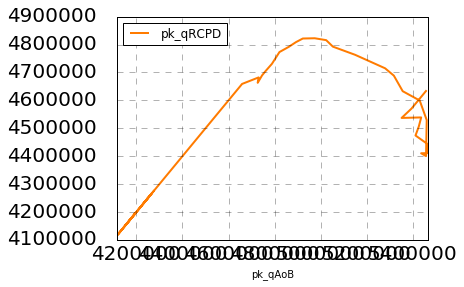

In [22]:
Alldatagrouped.plot(x='pk_qAoB', y='pk_qRCPD')

In [23]:
# Alldatagrouped['RCPD2']=Alldatagrouped.pk_qRCPD**2
# Alldatagrouped.head()

In [24]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# results = smf.ols('pk_qAoB ~ RCPD2-1', data=Alldatagrouped).fit()
# print (results.summary())
# para=results.params

In [25]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
results = smf.ols('pk_qAoB ~ logRCPD-1', data=Alldatagrouped).fit()
print (results.summary())
para=results.params


f = open('pics/TPM/reg1.csv','w')
f.write(results.summary().as_csv())
f.close()

                            OLS Regression Results                            
Dep. Variable:                pk_qAoB   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     4781.
Date:                Tue, 09 Jul 2019   Prob (F-statistic):           4.47e-44
Time:                        14:05:21   Log-Likelihood:                -606.61
No. Observations:                  42   AIC:                             1215.
Df Residuals:                      41   BIC:                             1217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
logRCPD     3.193e+05   4617.548     69.146      0.0

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


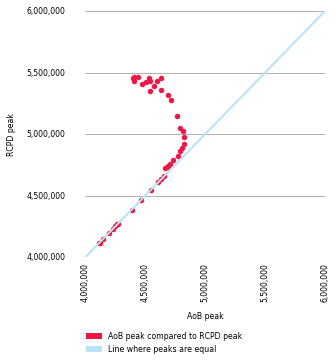

In [26]:
import matplotlib.patches as mpatches
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
matplotlib.pyplot.scatter(Alldatagrouped.pk_qRCPD,Alldatagrouped.pk_qAoB, edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
ax.set_xlim(4000000,6000000)
ax.set_ylim(4000000,6000000)
ax.axhline(0, color='k', lw=2, alpha=0.6)
x = np.linspace(*ax.get_xlim())
# y=para[0]+para[1]*x
y=para[0]*np.log(x)
#ax.plot(x, y, color=(ea_p['bl1']))
ax.plot(x, x, color=(ea_p['bl2']))

ax.set_ylabel(r"RCPD peak", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_xlabel(r"AoB peak", fontsize=7.8,  family='arial' , labelpad=10)

setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
#p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
r = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')

ax.legend([q,r],['AoB peak compared to RCPD peak','Line where peaks are equal'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)

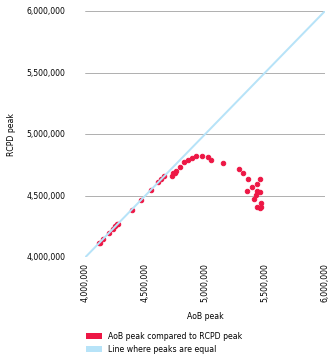

In [27]:
import matplotlib.patches as mpatches
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
matplotlib.pyplot.scatter(Alldatagrouped.pk_qAoB,Alldatagrouped.pk_qRCPD, edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
ax.set_xlim(4000000,6000000)
ax.set_ylim(4000000,6000000)
ax.axhline(0, color='k', lw=2, alpha=0.6)
x = np.linspace(*ax.get_xlim())
# y=para[0]+para[1]*x
y=para[0]*np.log(x)
# ax.plot(x, y, color=(ea_p['bl1']))
ax.plot(x, x, color=(ea_p['bl2']))

ax.set_ylabel(r"RCPD peak", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_xlabel(r"AoB peak", fontsize=7.8,  family='arial' , labelpad=10)

setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
#p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
r = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')

ax.legend([q,r],['AoB peak compared to RCPD peak','Line where peaks are equal'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)

pylab.savefig(path +'pics/TPM/TPMpic1.png', dpi=300, transparent=True)


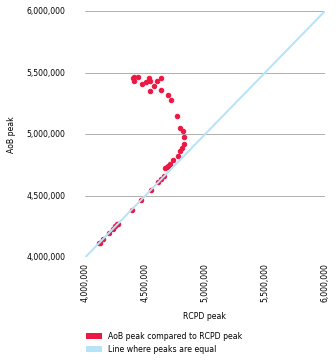

In [28]:
import matplotlib.patches as mpatches
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
matplotlib.pyplot.scatter(Alldatagrouped.pk_qRCPD,Alldatagrouped.pk_qAoB, edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
ax.set_xlim(4000000,6000000)
ax.set_ylim(4000000,6000000)
ax.axhline(0, color='k', lw=2, alpha=0.6)
x = np.linspace(*ax.get_xlim())
# y=para[0]+para[1]*x
y=para[0]*np.log(x)
# ax.plot(x, y, color=(ea_p['bl1']))
ax.plot(x, x, color=(ea_p['bl2']))

ax.set_ylabel(r"AoB peak", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_xlabel(r"RCPD peak", fontsize=7.8,  family='arial' , labelpad=10)

setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
#p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
r = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')

ax.legend([q,r],['AoB peak compared to RCPD peak','Line where peaks are equal'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic2.png', dpi=300, transparent=True)

In [29]:
Alldatagrouped.head()

pk_qAoB       sh_qAoB      off_qAoB     pk_qRCPD      sh_qRCPD     off_qRCPD    logRCPD
m_yr                                                                                               
2008.0  4275216.957  7.491743e+06  2.297646e+07  4275216.957  7.491743e+06  2.297646e+07  15.268345
2009.0  4115429.417  7.263270e+06  2.408701e+07  4115429.417  7.263270e+06  2.408701e+07  15.230254
2010.0  4267154.887  7.512765e+06  2.428008e+07  4267154.887  7.512765e+06  2.428008e+07  15.266458
2011.0  4231124.246  7.446265e+06  2.440075e+07  4231124.246  7.446265e+06  2.440075e+07  15.257978
2012.0  4251631.700  7.556187e+06  2.370709e+07  4251631.700  7.556187e+06  2.370709e+07  15.262813

In [30]:
Unstacked=groupedAoB['pk_mw'].unstack(level=1)

#HydroUnstacked = HydroUnstacked.xs('Inflows_GWhPerDay',level=0, axis=1).copy()
Unstacked

fuel    Geo    hydro  thermal    wind
m_yr                                 
2016  747.0  4853.65   1728.6   65.48
2017  747.0  4853.65   1728.6   65.48
2018  747.0  4853.65   1728.6   65.48
2019  747.0  4853.65   1728.6   65.48
2020  972.0  4870.65   1823.6   65.48
2021  972.0  4870.65   1823.6   65.48
2022  972.0  4905.65   1823.6   65.48
2023  972.0  4958.15   1823.6   65.48
2024  972.0  4958.15   1348.6   65.48
2025  972.0  5275.15   1348.6   65.48
2026  972.0  5275.15   1348.6   65.48
2027  972.0  5275.15   1348.6   65.48
2028  972.0  5275.15   1306.8   65.48
2029  972.0  5275.15   1306.8   65.48
2030  972.0  5275.15   1306.8   65.48
2031  972.0  5275.15   1306.8   65.48
2032  972.0  5275.15   1306.8  150.48
2033  972.0  5275.15   1306.8  230.48
2034  972.0  5530.15   1306.8  230.48
2035  972.0  5530.15   1306.8  230.48
2036  972.0  5860.15   1306.8  230.48
2037  972.0  5860.15   1306.8  230.48
2038  972.0  5860.15   1306.8  230.48
2039  972.0  5860.15   1306.8  230.48
2040  972.0  5860.15   1306.8  230.48
2041  972.0  5860.15   1306.8  230.48
2042  972.0  5860.15   1306.8  230.48
2043  972.0  5860.15   1306.8  230.48
2044  972.0  5860.15   1306.8  230.48
2045  972.0  5860.15   1306.8  230.48
2046  972.0  5860.15   1306.8  230.48
2047  972.0  5860.15   1306.8  313.28
2048  972.0  5860.15   1306.8  313.28
2049  972.0  5860.15   1306.8  313.28
2050  972.0  5860.15   1306.8  313.28

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


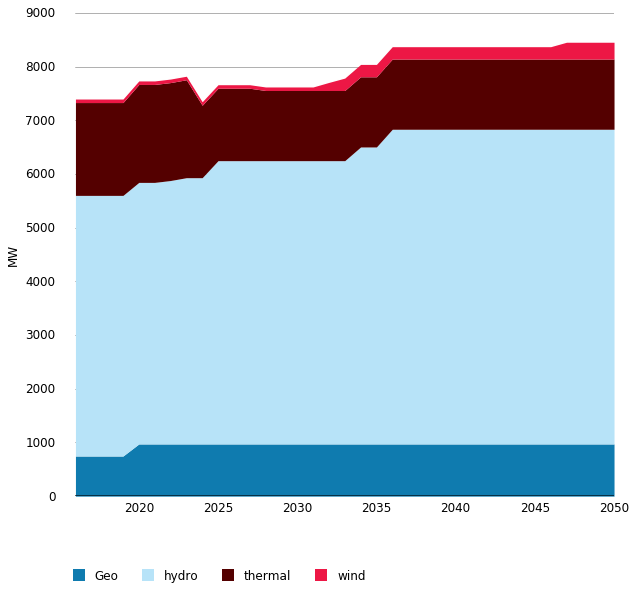

In [31]:
Unstacked=groupedAoB['pk_mw'].unstack(level=1)
Unstacked['total']=Unstacked.sum(axis=1)



mpl.rcParams['axes.color_cycle'] = [(ea_s['bl1']),(ea_p['bl2']),(ea_p['br1']) ,(ea_p['rd1']),(ea_p['yl1'])]
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['xtick.major.width'] = 0
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1
matplotlib.rcParams['legend.handlelength'] = 1
matplotlib.rcParams['legend.handleheight'] = 1.25
import matplotlib.dates as mdates
ea_p=ea.ea_p
ea_s=ea.ea_s
fig = plt.figure(2,figsize=[cm2inch(25),cm2inch(31)])
ax=fig.add_subplot(111)
Unstacked[['Geo', 'hydro', 'thermal', 'wind']].plot(ax=ax, kind='area', lw=.005)
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.35)
plt.subplots_adjust(right=0.9)
ax.set_frame_on(False)
ax.xaxis.tick_bottom()
ax.axhline(0, color='k', lw=2, alpha=0.6)
setp(ax.get_xticklabels(),  rotation =0, fontsize=12)
setp(ax.get_xticklabels(minor=True),  rotation =0, fontsize=12)
setp(ax.get_yticklabels(),  fontsize=12)
ax.set_ylabel(r"MW", fontsize=12,  family='arial' )
ax.set_xlabel(r"", fontsize=12,  family='arial' )


# months   = mdates.MonthLocator(bymonthday=19, interval =1)
# months2   = mdates.MonthLocator(bymonthday=1)
# yearsFmt = mdates.DateFormatter('Y')

# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months2)

#ea.plot_formatting(ax)



p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
q = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')
r = Rectangle((0, 0), 1, 1, fc=ea_p['br1'], ec='none')
s = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
#t = Rectangle((0, 0), 1, 1, fc=ea_p['yl1'], ec='none')
ax.legend([p,q,r,s],['Geo', 'hydro', 'thermal', 'wind'],loc=3, 
          bbox_to_anchor=(-0.025, -0.20),ncol=5, fontsize=12, frameon=False)
#pylab.savefig(path +'pics/slowthermal.png', dpi=300, transparent=True)
pylab.savefig(path +'pics/TPM/TPMpic3.png', dpi=300, transparent=True)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


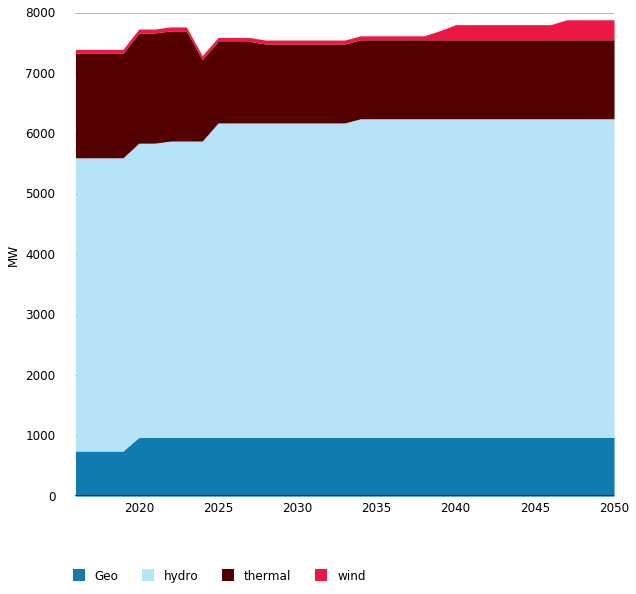

In [32]:
Unstacked=groupedRCPD['pk_mw'].unstack(level=1)

Unstacked.head()

mpl.rcParams['axes.color_cycle'] = [(ea_s['bl1']),(ea_p['bl2']),(ea_p['br1']) ,(ea_p['rd1']),(ea_p['yl1'])]
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['xtick.major.width'] = 0
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1
matplotlib.rcParams['legend.handlelength'] = 1
matplotlib.rcParams['legend.handleheight'] = 1.25
import matplotlib.dates as mdates
ea_p=ea.ea_p
ea_s=ea.ea_s
fig = plt.figure(2,figsize=[cm2inch(25),cm2inch(31)])
ax=fig.add_subplot(111)
Unstacked[['Geo', 'hydro', 'thermal', 'wind']].plot(ax=ax, kind='area', lw=.005)
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.35)
plt.subplots_adjust(right=0.9)
ax.set_frame_on(False)
ax.xaxis.tick_bottom()
ax.axhline(0, color='k', lw=2, alpha=0.6)
setp(ax.get_xticklabels(),  rotation =0, fontsize=12)
setp(ax.get_xticklabels(minor=True),  rotation =0, fontsize=12)
setp(ax.get_yticklabels(),  fontsize=12)
ax.set_ylabel(r"MW", fontsize=12,  family='arial' )
ax.set_xlabel(r"", fontsize=12,  family='arial' )


# months   = mdates.MonthLocator(bymonthday=19, interval =1)
# months2   = mdates.MonthLocator(bymonthday=1)
# yearsFmt = mdates.DateFormatter('Y')

# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months2)

#ea.plot_formatting(ax)



p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
q = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')
r = Rectangle((0, 0), 1, 1, fc=ea_p['br1'], ec='none')
s = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
#t = Rectangle((0, 0), 1, 1, fc=ea_p['yl1'], ec='none')
ax.legend([p,q,r,s],['Geo', 'hydro', 'thermal', 'wind'],loc=3, 
          bbox_to_anchor=(-0.025, -0.20),ncol=5, fontsize=12, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic4.png', dpi=300, transparent=True)

In [33]:
AoB= read_csv('aob.csv',parse_dates=True, na_values='NaN')
RCPD= read_csv('rcpd.csv',parse_dates=True, na_values='NaN')

AoB=AoB.set_index(['m_yr','bb','type'])
RCPD=RCPD.set_index(['m_yr','bb','type'])
AoBList=AoB.columns.tolist()
RCPDList=RCPD.columns.tolist()

In [34]:
AoBList

['Unnamed: 0',
 'p_yr',
 'pk_s',
 'dg_s',
 'sh_s',
 'off_s',
 'pk_p',
 'dg_p',
 'sh_p',
 'off_p',
 'pk_q',
 'dg_q',
 'sh_q',
 'off_q',
 'exp_per_icp',
 'exp_all',
 'icp',
 'dg_max',
 'earn_icp',
 'dg_icp',
 'pk_pt',
 'dg_pt',
 'sh_pt',
 'off_pt',
 'pk_i',
 'dg_i',
 'sh_i',
 'off_i',
 'pk_ic',
 'dg_ic',
 'sh_ic',
 'off_ic',
 'pk_pg',
 'dg_pg',
 'sh_pg',
 'off_pg',
 'pk_px',
 'dg_px',
 'sh_px',
 'off_px',
 'pk_e',
 'dg_e',
 'sh_e',
 'off_e',
 'pk_pt_mu',
 'dg_pt_mu',
 'sh_pt_mu',
 'off_pt_mu',
 'pk_s_pt_mu',
 'dg_s_pt_mu',
 'sh_s_pt_mu',
 'off_s_pt_mu',
 'pk_ns_pt_mu',
 'dg_ns_pt_mu',
 'sh_ns_pt_mu',
 'off_ns_pt_mu',
 'pk_pt_sd',
 'dg_pt_sd',
 'sh_pt_sd',
 'off_pt_sd',
 'pk_s_pt_sd',
 'dg_s_pt_sd',
 'sh_s_pt_sd',
 'off_s_pt_sd',
 'pk_ns_pt_sd',
 'dg_ns_pt_sd',
 'sh_ns_pt_sd',
 'off_ns_pt_sd',
 'pk_theta',
 'dg_theta',
 'sh_theta',
 'off_theta',
 'pk_pr',
 'dg_pr',
 'sh_pr',
 'off_pr',
 'pk_rev',
 'dg_rev',
 'sh_rev',
 'off_rev']

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


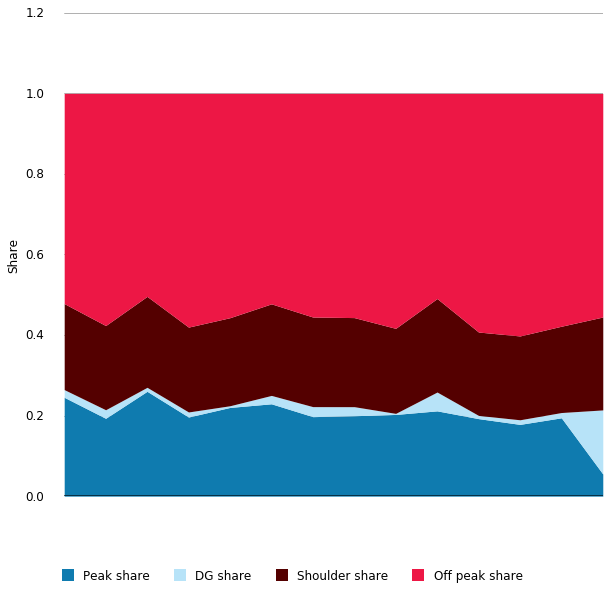

In [35]:


mpl.rcParams['axes.color_cycle'] = [(ea_s['bl1']),(ea_p['bl2']),(ea_p['br1']) ,(ea_p['rd1']),(ea_p['yl1'])]
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['xtick.major.width'] = 0
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1
matplotlib.rcParams['legend.handlelength'] = 1
matplotlib.rcParams['legend.handleheight'] = 1.25
import matplotlib.dates as mdates
ea_p=ea.ea_p
ea_s=ea.ea_s
fig = plt.figure(2,figsize=[cm2inch(25),cm2inch(31)])
ax=fig.add_subplot(111)
AoB.groupby(level=[1]).mean()[['pk_s', 'dg_s', 'sh_s', 'off_s']].plot(ax=ax, kind='area', lw=.005)
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.35)
plt.subplots_adjust(right=0.9)
ax.set_frame_on(False)
ax.xaxis.tick_bottom()
ax.axhline(0, color='k', lw=2, alpha=0.6)
setp(ax.get_xticklabels(),  rotation =0, fontsize=12)
setp(ax.get_xticklabels(minor=True),  rotation =0, fontsize=12)
setp(ax.get_yticklabels(),  fontsize=12)
ax.set_ylabel(r"Share", fontsize=12,  family='arial' )
ax.set_xlabel(r"", fontsize=12,  family='arial' )


# months   = mdates.MonthLocator(bymonthday=19, interval =1)
# months2   = mdates.MonthLocator(bymonthday=1)
# yearsFmt = mdates.DateFormatter('Y')

# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months2)

#ea.plot_formatting(ax)



p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
q = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')
r = Rectangle((0, 0), 1, 1, fc=ea_p['br1'], ec='none')
s = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
#t = Rectangle((0, 0), 1, 1, fc=ea_p['yl1'], ec='none')
ax.legend([p,q,r,s],['Peak share', 'DG share', 'Shoulder share', 'Off peak share'],loc=3, 
          bbox_to_anchor=(-0.025, -0.20),ncol=5, fontsize=12, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic5.png', dpi=300, transparent=True)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


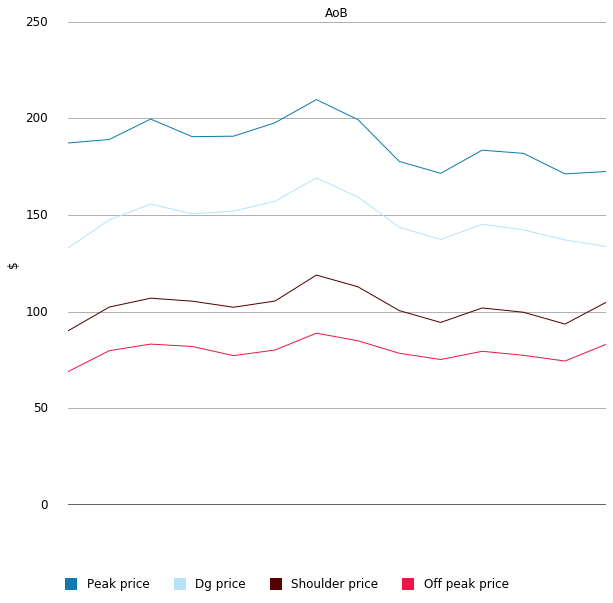

In [36]:
mpl.rcParams['axes.color_cycle'] = [(ea_s['bl1']),(ea_p['bl2']),(ea_p['br1']) ,(ea_p['rd1']),(ea_p['yl1'])]
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['xtick.major.width'] = 0
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1
matplotlib.rcParams['legend.handlelength'] = 1
matplotlib.rcParams['legend.handleheight'] = 1.25
import matplotlib.dates as mdates
ea_p=ea.ea_p
ea_s=ea.ea_s

fig = plt.figure(2,figsize=[cm2inch(25),cm2inch(31)])
ax=fig.add_subplot(111)
AoB.groupby(level=[1]).mean()[['pk_p', 'dg_p', 'sh_p', 'off_p']].plot(ax=ax, kind='line', lw=1)
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.35)
plt.subplots_adjust(right=0.9)
ax.set_frame_on(False)
ax.xaxis.tick_bottom()
ax.axhline(0, color='k', lw=2, alpha=0.6)
setp(ax.get_xticklabels(),  rotation =0, fontsize=12)
setp(ax.get_xticklabels(minor=True),  rotation =0, fontsize=12)
setp(ax.get_yticklabels(),  fontsize=12)
ax.set_ylabel(r"$", fontsize=12,  family='arial' )
ax.set_xlabel(r"", fontsize=12,  family='arial' )
plt.title('AoB')

months   = mdates.MonthLocator(bymonthday=19, interval =1)
months2   = mdates.MonthLocator(bymonthday=1)
yearsFmt = mdates.DateFormatter('Y')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months2)

#ea.plot_formatting(ax)



p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
q = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')
r = Rectangle((0, 0), 1, 1, fc=ea_p['br1'], ec='none')
s = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
#t = Rectangle((0, 0), 1, 1, fc=ea_p['yl1'], ec='none')
ax.legend([p,q,r,s],['Peak price', 'Dg price', 'Shoulder price', 'Off peak price'],loc=3, 
          bbox_to_anchor=(-0.025, -0.20),ncol=5, fontsize=12, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic6.png', dpi=300, transparent=True)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


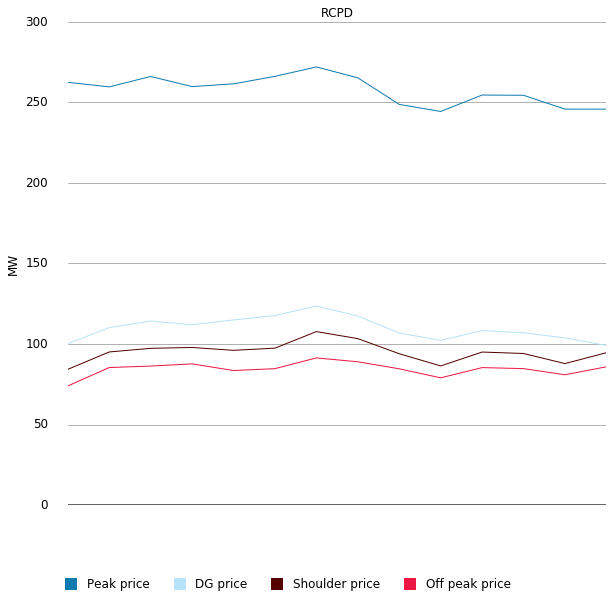

In [37]:
mpl.rcParams['axes.color_cycle'] = [(ea_s['bl1']),(ea_p['bl2']),(ea_p['br1']) ,(ea_p['rd1']),(ea_p['yl1'])]
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['xtick.major.width'] = 0
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1
matplotlib.rcParams['legend.handlelength'] = 1
matplotlib.rcParams['legend.handleheight'] = 1.25
import matplotlib.dates as mdates
ea_p=ea.ea_p
ea_s=ea.ea_s
fig = plt.figure(2,figsize=[cm2inch(25),cm2inch(31)])
ax=fig.add_subplot(111)
RCPD.groupby(level=[1]).mean()[['pk_p', 'dg_p', 'sh_p', 'off_p']].plot(ax=ax, kind='line', lw=1)
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.35)
plt.subplots_adjust(right=0.9)
ax.set_frame_on(False)
ax.xaxis.tick_bottom()
ax.axhline(0, color='k', lw=2, alpha=0.6)
setp(ax.get_xticklabels(),  rotation =0, fontsize=12)
setp(ax.get_xticklabels(minor=True),  rotation =0, fontsize=12)
setp(ax.get_yticklabels(),  fontsize=12)
ax.set_ylabel(r"MW", fontsize=12,  family='arial' )
ax.set_xlabel(r"", fontsize=12,  family='arial' )
plt.title('RCPD')

# months   = mdates.MonthLocator(bymonthday=19, interval =1)
# months2   = mdates.MonthLocator(bymonthday=1)
# yearsFmt = mdates.DateFormatter('Y')

# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months2)

#ea.plot_formatting(ax)



p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
q = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')
r = Rectangle((0, 0), 1, 1, fc=ea_p['br1'], ec='none')
s = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
#t = Rectangle((0, 0), 1, 1, fc=ea_p['yl1'], ec='none')
ax.legend([p,q,r,s],['Peak price', 'DG price', 'Shoulder price', 'Off peak price'],loc=3, 
          bbox_to_anchor=(-0.025, -0.20),ncol=5, fontsize=12, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic7.png', dpi=300, transparent=True)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


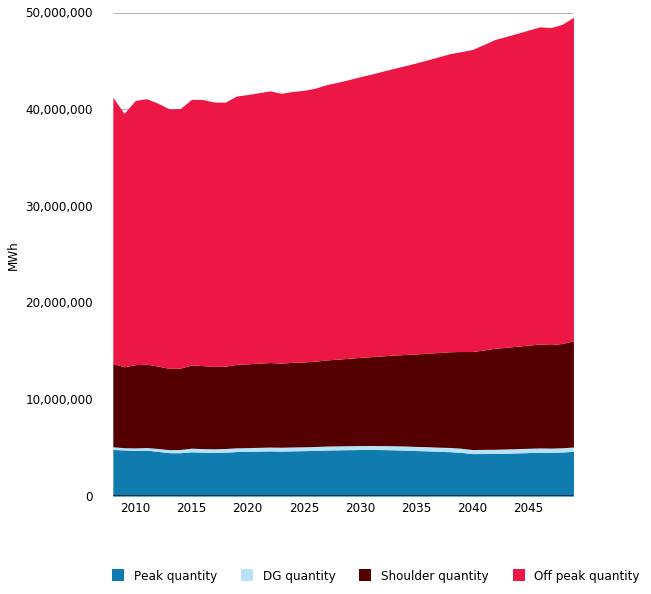

In [38]:
mpl.rcParams['axes.color_cycle'] = [(ea_s['bl1']),(ea_p['bl2']),(ea_p['br1']) ,(ea_p['rd1']),(ea_p['yl1'])]
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['xtick.major.width'] = 0
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1
matplotlib.rcParams['legend.handlelength'] = 1
matplotlib.rcParams['legend.handleheight'] = 1.25
import matplotlib.dates as mdates
ea_p=ea.ea_p
ea_s=ea.ea_s
fig = plt.figure(2,figsize=[cm2inch(25),cm2inch(31)])
ax=fig.add_subplot(111)
RCPD.groupby(level=[0]).sum()[['pk_q', 'dg_q', 'sh_q', 'off_q']].plot(ax=ax, kind='area', lw=.005)
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.35)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
ax.set_frame_on(False)
ax.xaxis.tick_bottom()
ax.axhline(0, color='k', lw=2, alpha=0.6)
setp(ax.get_xticklabels(),  rotation =0, fontsize=12)
setp(ax.get_xticklabels(minor=True),  rotation =0, fontsize=12)
setp(ax.get_yticklabels(),  fontsize=12)
ax.set_ylabel(r"MWh", fontsize=12,  family='arial' )
ax.set_xlabel(r"", fontsize=12,  family='arial' )

def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s

y_format = tkr.FuncFormatter(func)  # make formatter
ax.yaxis.set_major_formatter(y_format) 
# months   = mdates.MonthLocator(bymonthday=19, interval =1)
# months2   = mdates.MonthLocator(bymonthday=1)
# yearsFmt = mdates.DateFormatter('Y')

# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months2)

#ea.plot_formatting(ax)



p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
q = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')
r = Rectangle((0, 0), 1, 1, fc=ea_p['br1'], ec='none')
s = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
#t = Rectangle((0, 0), 1, 1, fc=ea_p['yl1'], ec='none')
ax.legend([p,q,r,s],['Peak quantity', 'DG quantity', 'Shoulder quantity', 'Off peak quantity'],loc=3, 
          bbox_to_anchor=(-0.025, -0.20),ncol=5, fontsize=12, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic8.png', dpi=300, transparent=True)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


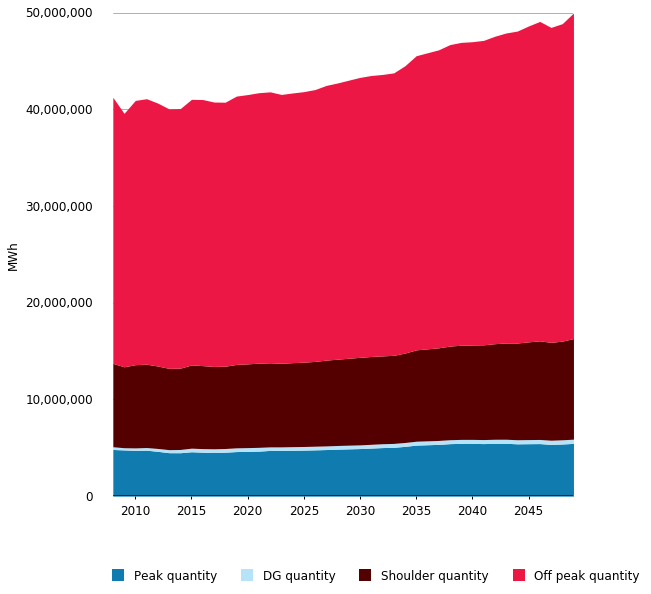

In [39]:
mpl.rcParams['axes.color_cycle'] = [(ea_s['bl1']),(ea_p['bl2']),(ea_p['br1']) ,(ea_p['rd1']),(ea_p['yl1'])]
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 1
matplotlib.rcParams['legend.handlelength'] = 1
matplotlib.rcParams['legend.handleheight'] = 1.25
import matplotlib.dates as mdates
ea_p=ea.ea_p
ea_s=ea.ea_s
fig = plt.figure(2,figsize=[cm2inch(25),cm2inch(31)])
ax=fig.add_subplot(111)
AoB.groupby(level=[0]).sum()[['pk_q', 'dg_q', 'sh_q', 'off_q']].plot(ax=ax, kind='area', lw=.005)
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.35)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
ax.set_frame_on(False)
ax.xaxis.tick_bottom()
ax.axhline(0, color='k', lw=2, alpha=0.6)
setp(ax.get_xticklabels(),  rotation =0, fontsize=12)
setp(ax.get_xticklabels(minor=True),  rotation =0, fontsize=12)
setp(ax.get_yticklabels(),  fontsize=12)
ax.set_ylabel(r"MWh", fontsize=12,  family='arial' )
ax.set_xlabel(r"", fontsize=12,  family='arial' )

y_format = tkr.FuncFormatter(func)  # make formatter
ax.yaxis.set_major_formatter(y_format) 
# months   = mdates.MonthLocator(bymonthday=19, interval =1)
# months2   = mdates.MonthLocator(bymonthday=1)
# yearsFmt = mdates.DateFormatter('Y')

# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months2)

#ea.plot_formatting(ax)



p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
q = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')
r = Rectangle((0, 0), 1, 1, fc=ea_p['br1'], ec='none')
s = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
#t = Rectangle((0, 0), 1, 1, fc=ea_p['yl1'], ec='none')
ax.legend([p,q,r,s],['Peak quantity', 'DG quantity', 'Shoulder quantity', 'Off peak quantity'],loc=3, 
          bbox_to_anchor=(-0.025, -0.20),ncol=5, fontsize=12, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic9.png', dpi=300, transparent=True)

In [40]:
RCPD.head()

Unnamed: 0    p_yr      pk_s      dg_s      sh_s     off_s        pk_p        dg_p        sh_p       off_p        pk_q        dg_q        sh_q       off_q  exp_per_icp       exp_all      icp  dg_max     earn_icp    dg_icp      pk_pt      dg_pt      sh_pt     off_pt        pk_i  dg_i  sh_i  off_i        pk_ic  dg_ic  sh_ic  off_ic       pk_pg       dg_pg       sh_pg      off_pg       pk_px       dg_px       sh_px      off_px          pk_e          dg_e          sh_e        off_e  pk_pt_mu  dg_pt_mu  sh_pt_mu  off_pt_mu  pk_s_pt_mu  dg_s_pt_mu  sh_s_pt_mu  off_s_pt_mu  pk_ns_pt_mu  dg_ns_pt_mu  sh_ns_pt_mu  off_ns_pt_mu  pk_pt_sd  dg_pt_sd  sh_pt_sd  off_pt_sd  pk_s_pt_sd  dg_s_pt_sd  sh_s_pt_sd  off_s_pt_sd  pk_ns_pt_sd  dg_ns_pt_sd  sh_ns_pt_sd  off_ns_pt_sd  pk_theta  dg_theta  sh_theta  off_theta       pk_pr  dg_pr  sh_pr  off_pr       pk_rev  dg_rev  sh_rev  off_rev
m_yr   bb  type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
2008.0 BEN 1.0          180  2010.0  0.449560  0.004080  0.141220  0.405140  436.924471  229.852356  185.570267  160.452524  245177.854   4229.6455  181337.355  601669.395  5932.249359  2.382866e+08  40168.0  18.857  34408.65677  0.000469  24.478726  24.478726  11.473484  22.808725  207.072116   0.0   0.0    0.0  50769496.93    0.0    0.0     0.0  205.373629  205.373629  174.096783  137.643799  229.852356  229.852356  185.570267  160.452524  1.071242e+08  9.721940e+05  3.365082e+07  96539372.72  0.946813  0.946813  0.896314   0.874214    1.130743    1.130743    0.946813     1.130743     0.946813     0.946813     0.896314      0.874177  0.175822  0.175822  0.227123    0.30899     0.03514     0.03514    0.175822      0.03514     0.175822     0.175822     0.227123      0.308997       0.0       0.0       0.0   0.000213  102.040969    0.0    0.0     0.0  25018185.88     0.0     0.0      0.0
2009.0 BEN 1.0          181  2011.0  0.496071  0.007327  0.145557  0.351045  131.502056   71.079734   44.194377   30.881418  205429.342   5613.4880  179356.641  619038.126  1331.785679  5.445672e+07  40890.0  18.896  33040.85909  0.000462 -18.703813 -18.703813 -13.652634  -7.912340   60.422323   0.0   0.0    0.0  12412517.96    0.0    0.0     0.0   89.783546   89.783546   57.847011   38.793758   71.079734   71.079734   44.194377   30.881418  2.701438e+07  3.990052e+05  7.926555e+06  19116775.25  0.946813  0.946813  0.896314   0.874214    1.130743    1.130743    0.946813     1.130743     0.946813     0.946813     0.896314      0.874177  0.175822  0.175822  0.227123    0.30899     0.03514     0.03514    0.175822      0.03514     0.175822     0.175822     0.227123      0.308997       0.0       0.0       0.0   0.000213  103.018564    0.0    0.0     0.0  21163035.77     0.0     0.0      0.0
2010.0 BEN 1.0          182  2012.0  0.528737  0.003633  0.131211  0.336419  378.906776   74.598070   79.385805   59.709404  160996.263   5618.7040  190693.325  650049.098  2779.094464  1.153741e+08  41515.0  18.584  31706.40551  0.000448  -5.339859  -5.339859 -10.179374  -2.536321  304.308707   0.0   0.0    0.0  48992564.54    0.0    0.0     0.0   79.937929   79.937929   89.565179   62.245725   74.598070   74.598070 

In [41]:
REGdata=pandas.concat([RCPD.groupby(level=[0]).sum()[['pk_q']], AoB.groupby(level=[0]).sum()[['pk_q']]], axis=1, keys=['RCPD', 'AoB'])

import statsmodels.api as sm
import statsmodels.formula.api as smf
results = smf.ols('RCPD~ AoB', data=REGdata).fit()
print (results.summary())
para=results.params


f = open('pics/TPM/reg2.csv','w')
f.write(results.summary().as_csv())
f.close()

                            OLS Regression Results                            
Dep. Variable:                   RCPD   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     4.527
Date:                Tue, 09 Jul 2019   Prob (F-statistic):             0.0396
Time:                        14:05:26   Log-Likelihood:                -550.88
No. Observations:                  42   AIC:                             1106.
Df Residuals:                      40   BIC:                             1109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.22e+06   2.74e+05     19.030      0.0

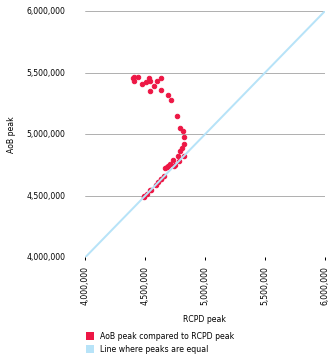

In [42]:
import matplotlib.patches as mpatches
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
matplotlib.pyplot.scatter(RCPD.groupby(level=[0]).sum()[['pk_q']],AoB.groupby(level=[0]).sum()[['pk_q']], edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
ax.set_xlim(4000000,6000000)
ax.set_ylim(4000000,6000000)
ax.axhline(0, color='k', lw=2, alpha=0.6)
x = np.linspace(*ax.get_xlim())
#y=para[0]+para[1]*x
y=para[0]*np.log(x)
#ax.plot(x, y, color=(ea_p['bl1']))
ax.plot(x, x, color=(ea_p['bl2']))

ax.set_ylabel(r"AoB peak", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_xlabel(r"RCPD peak", fontsize=7.8,  family='arial' , labelpad=10)

setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
#p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
r = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')

ax.legend([q,r],['AoB peak compared to RCPD peak','Line where peaks are equal'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)

pylab.savefig(path +'pics/TPM/TPMpic10.png', dpi=300, transparent=True)

In [43]:
REGdata=pandas.concat([RCPD.groupby(level=[0]).sum()[['sh_q']], AoB.groupby(level=[0]).sum()[['sh_q']]], axis=1, keys=['RCPD', 'AoB'])

import statsmodels.api as sm
import statsmodels.formula.api as smf
results = smf.ols('RCPD~ AoB', data=REGdata).fit()
print (results.summary())
para=results.params

f = open('pics/TPM/reg3.csv','w')
f.write(results.summary().as_csv())
f.close()

                            OLS Regression Results                            
Dep. Variable:                   RCPD   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     5101.
Date:                Tue, 09 Jul 2019   Prob (F-statistic):           8.32e-44
Time:                        14:05:27   Log-Likelihood:                -529.46
No. Observations:                  42   AIC:                             1063.
Df Residuals:                      40   BIC:                             1066.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.883e+06   1.71e+05    -16.824      0.0

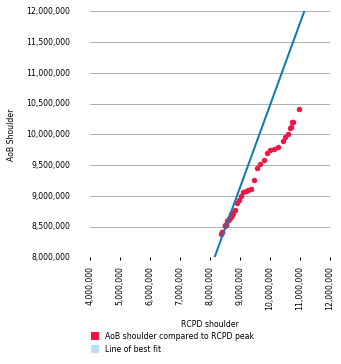

In [44]:
import matplotlib.patches as mpatches
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
matplotlib.pyplot.scatter(RCPD.groupby(level=[0]).sum()[['sh_q']],AoB.groupby(level=[0]).sum()[['sh_q']], edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
ax.set_xlim(4000000,12000000)
ax.set_ylim(8000000,12000000)
ax.axhline(0, color='k', lw=2, alpha=0.6)
x = np.linspace(*ax.get_xlim())
y=para[0]+para[1]*x
#y=para[0]*np.log(x)
ax.plot(x, y, color=(ea_p['bl1']))
#ax.plot(x, x, color=(ea_p['bl2']))

ax.set_xlabel(r"RCPD shoulder", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_ylabel(r"AoB Shoulder", fontsize=7.8,  family='arial' , labelpad=10)

setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
#p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
r = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')

ax.legend([q,r],['AoB shoulder compared to RCPD peak','Line of best fit'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)

pylab.savefig(path +'pics/TPM/TPMpic11.png', dpi=300, transparent=True)

In [45]:
REGdata=pandas.concat([RCPD.groupby(level=[0]).sum()[['off_q']], AoB.groupby(level=[0]).sum()[['off_q']]], axis=1, keys=['RCPD', 'AoB'])

import statsmodels.api as sm
import statsmodels.formula.api as smf
results = smf.ols('RCPD~ AoB', data=REGdata).fit()
print (results.summary())
para=results.params


f = open('pics/TPM/reg4.csv','w')
f.write(results.summary().as_csv())
f.close()

                            OLS Regression Results                            
Dep. Variable:                   RCPD   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     6553.
Date:                Tue, 09 Jul 2019   Prob (F-statistic):           5.74e-46
Time:                        14:05:27   Log-Likelihood:                -562.61
No. Observations:                  42   AIC:                             1129.
Df Residuals:                      40   BIC:                             1133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.389e+05   3.57e+05      1.510      0.1

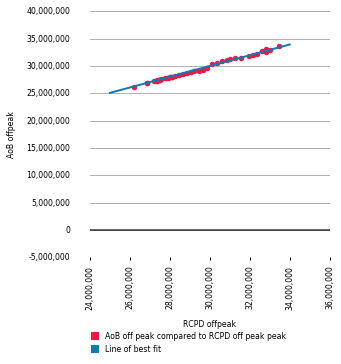

In [46]:
import matplotlib.patches as mpatches
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
matplotlib.pyplot.scatter(RCPD.groupby(level=[0]).sum()[['off_q']],AoB.groupby(level=[0]).sum()[['off_q']], edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
#ax.set_xlim(24000000,36000000)
#ax.set_ylim(400000,6000000)
ax.axhline(0, color='k', lw=2, alpha=0.6)
x = np.linspace(*ax.get_xlim())
y=para[0]+para[1]*x
#y=para[0]*np.log(x)
ax.plot(x, y, color=(ea_p['bl1']))
#ax.plot(x, x, color=(ea_p['bl2']))

ax.set_xlabel(r"RCPD offpeak", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_ylabel(r"AoB offpeak", fontsize=7.8,  family='arial' , labelpad=10)

setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
#r = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')

ax.legend([q,p],['AoB off peak compared to RCPD off peak peak','Line of best fit'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)

pylab.savefig(path +'pics/TPM/TPMpic12.png', dpi=300, transparent=True)

In [47]:
REGdata=pandas.concat([RCPD.groupby(level=[0]).sum()[['dg_q']], AoB.groupby(level=[0]).sum()[['dg_q']]], axis=1, keys=['RCPD', 'AoB'])

import statsmodels.api as sm
import statsmodels.formula.api as smf
results = smf.ols('RCPD~ AoB', data=REGdata).fit()
print (results.summary())
para=results.params

f = open('pics/TPM/reg5.csv','w')
f.write(results.summary().as_csv())
f.close()

                            OLS Regression Results                            
Dep. Variable:                   RCPD   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     919.9
Date:                Tue, 09 Jul 2019   Prob (F-statistic):           3.19e-29
Time:                        14:05:27   Log-Likelihood:                -451.10
No. Observations:                  42   AIC:                             906.2
Df Residuals:                      40   BIC:                             909.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.377e+04   1.39e+04     -1.714      0.0

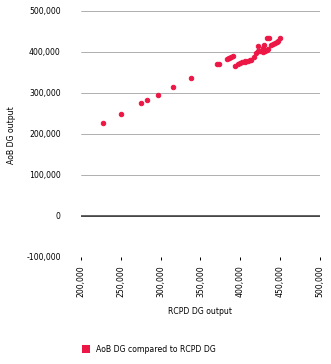

In [48]:
import matplotlib.patches as mpatches
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
matplotlib.pyplot.scatter(RCPD.groupby(level=[0]).sum()[['dg_q']],AoB.groupby(level=[0]).sum()[['dg_q']], edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
#ax.set_xlim(24000000,36000000)
#ax.set_ylim(400000,6000000)
ax.axhline(0, color='k', lw=2, alpha=0.6)
x = np.linspace(*ax.get_xlim())
y=para[0]+para[1]*x
#y=para[0]*np.log(x)
#ax.plot(x, y, color=(ea_p['bl1']))
#ax.plot(x, x, color=(ea_p['bl2']))

ax.set_xlabel(r"RCPD DG output", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_ylabel(r"AoB DG output", fontsize=7.8,  family='arial' , labelpad=10)

setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
#r = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')

ax.legend([q,p],['AoB DG compared to RCPD DG'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)

pylab.savefig(path +'pics/TPM/TPMpic13.png', dpi=300, transparent=True)

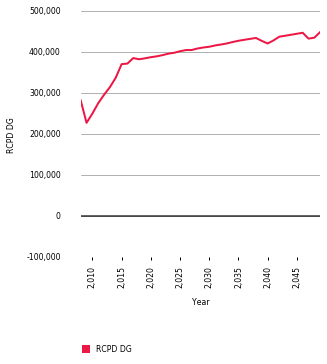

In [49]:
import matplotlib.patches as mpatches
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
#matplotlib.pyplot.scatter(RCPD.groupby(level=[0]).sum()[['dg_q']],AoB.groupby(level=[0]).sum()[['dg_q']], edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))

RCPD.groupby(level=[0]).sum()[['dg_q']].plot(ax=ax, kind='line', color = ea_p['rd1'], lw=2)

grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
#ax.set_xlim(24000000,36000000)
#ax.set_ylim(400000,6000000)
ax.axhline(0, color='k', lw=2, alpha=0.6)
# x = np.linspace(*ax.get_xlim())
# y=para[0]+para[1]*x
#y=para[0]*np.log(x)
#ax.plot(x, y, color=(ea_p['bl1']))
#ax.plot(x, x, color=(ea_p['bl2']))

ax.set_xlabel(r"Year", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_ylabel(r"RCPD DG", fontsize=7.8,  family='arial' , labelpad=10)

setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
#r = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')

ax.legend([q,p],['RCPD DG'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic14.png', dpi=300, transparent=True)

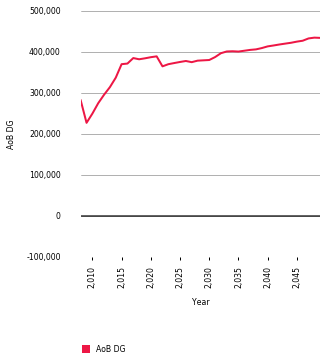

In [50]:
import matplotlib.patches as mpatches
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
#matplotlib.pyplot.scatter(RCPD.groupby(level=[0]).sum()[['dg_q']],AoB.groupby(level=[0]).sum()[['dg_q']], edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))

AoB.groupby(level=[0]).sum()[['dg_q']].plot(ax=ax, kind='line', color = ea_p['rd1'], lw=2)

grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
#ax.set_xlim(24000000,36000000)
#ax.set_ylim(400000,6000000)
ax.axhline(0, color='k', lw=2, alpha=0.6)
# x = np.linspace(*ax.get_xlim())
# y=para[0]+para[1]*x
#y=para[0]*np.log(x)
#ax.plot(x, y, color=(ea_p['bl1']))
#ax.plot(x, x, color=(ea_p['bl2']))

ax.set_xlabel(r"Year", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_ylabel(r"AoB DG", fontsize=7.8,  family='arial' , labelpad=10)

setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
#r = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')

ax.legend([q,p],['AoB DG'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic15.png', dpi=300, transparent=True)

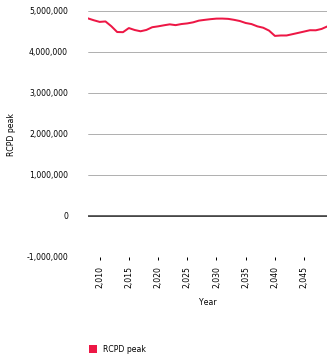

In [51]:
import matplotlib.patches as mpatches
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
#matplotlib.pyplot.scatter(RCPD.groupby(level=[0]).sum()[['dg_q']],AoB.groupby(level=[0]).sum()[['dg_q']], edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))

RCPD.groupby(level=[0]).sum()[['pk_q']].plot(ax=ax, kind='line', color = ea_p['rd1'], lw=2)

grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
#ax.set_xlim(24000000,36000000)
#ax.set_ylim(400000,6000000)
ax.axhline(0, color='k', lw=2, alpha=0.6)
# x = np.linspace(*ax.get_xlim())
# y=para[0]+para[1]*x
#y=para[0]*np.log(x)
#ax.plot(x, y, color=(ea_p['bl1']))
#ax.plot(x, x, color=(ea_p['bl2']))

ax.set_xlabel(r"Year", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_ylabel(r"RCPD peak", fontsize=7.8,  family='arial' , labelpad=10)

setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
#r = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')

ax.legend([q,p],['RCPD peak'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic16.png', dpi=300, transparent=True)

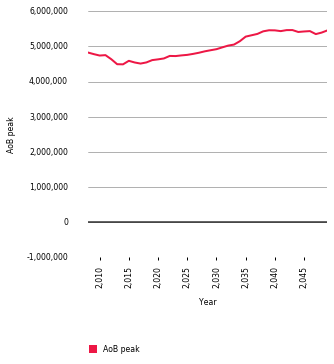

In [52]:
import matplotlib.patches as mpatches
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
#matplotlib.pyplot.scatter(RCPD.groupby(level=[0]).sum()[['dg_q']],AoB.groupby(level=[0]).sum()[['dg_q']], edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))

AoB.groupby(level=[0]).sum()[['pk_q']].plot(ax=ax, kind='line', color = ea_p['rd1'], lw=2)

grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
#ax.set_xlim(24000000,36000000)
#ax.set_ylim(400000,6000000)
ax.axhline(0, color='k', lw=2, alpha=0.6)
# x = np.linspace(*ax.get_xlim())
# y=para[0]+para[1]*x
#y=para[0]*np.log(x)
#ax.plot(x, y, color=(ea_p['bl1']))
#ax.plot(x, x, color=(ea_p['bl2']))

ax.set_xlabel(r"Year", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_ylabel(r"AoB peak", fontsize=7.8,  family='arial' , labelpad=10)

setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
#r = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')

ax.legend([q,p],['AoB peak'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic17.png', dpi=300, transparent=True)

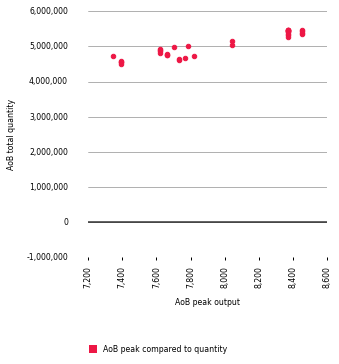

In [53]:
Unstacked=groupedAoB['pk_mw'].unstack(level=1)
Unstacked['total']=Unstacked.sum(axis=1)

import matplotlib.patches as mpatches
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
matplotlib.pyplot.scatter(Unstacked.total,AoB.groupby(level=[0]).sum().tail(35)[['pk_q']], edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
#ax.set_xlim(24000000,36000000)
#ax.set_ylim(400000,6000000)
ax.axhline(0, color='k', lw=2, alpha=0.6)
# x = np.linspace(*ax.get_xlim())
# y=para[0]+para[1]*x
#y=para[0]*np.log(x)
#ax.plot(x, y, color=(ea_p['bl1']))
#ax.plot(x, x, color=(ea_p['bl2']))

ax.set_xlabel(r"AoB peak output", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_ylabel(r"AoB total quantity", fontsize=7.8,  family='arial' , labelpad=10)

setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
#r = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')

ax.legend([q,p],['AoB peak compared to quantity'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic18.png', dpi=300, transparent=True)

In [54]:
len(Unstacked)

35

In [55]:
len(AoB.groupby(level=[0]).sum().tail(35)[['pk_q']])

35

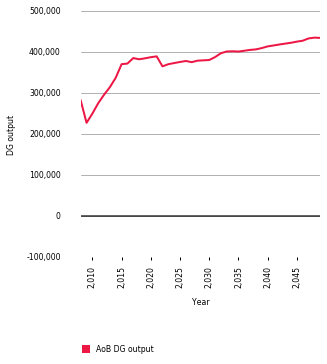

In [56]:
import matplotlib.patches as mpatches
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
#matplotlib.pyplot.scatter(RCPD.groupby(level=[0]).sum()[['dg_q']],AoB.groupby(level=[0]).sum()[['dg_q']], edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))

AoB.groupby(level=[0]).sum()[['dg_q']].plot(ax=ax, kind='line', color = ea_p['rd1'], lw=2)

grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
#ax.set_xlim(24000000,36000000)
#ax.set_ylim(400000,6000000)
ax.axhline(0, color='k', lw=2, alpha=0.6)
# x = np.linspace(*ax.get_xlim())
# y=para[0]+para[1]*x
#y=para[0]*np.log(x)
#ax.plot(x, y, color=(ea_p['bl1']))
#ax.plot(x, x, color=(ea_p['bl2']))

ax.set_xlabel(r"Year", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_ylabel(r"DG output", fontsize=7.8,  family='arial' , labelpad=10)

setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
#r = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')

ax.legend([q,p],['AoB DG output'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic19.png', dpi=300, transparent=True)

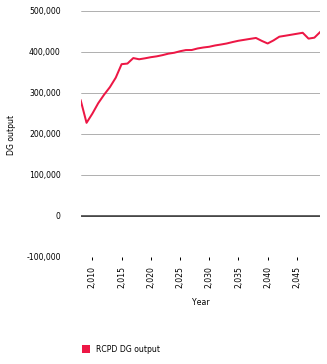

In [57]:
import matplotlib.patches as mpatches
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
#matplotlib.pyplot.scatter(RCPD.groupby(level=[0]).sum()[['dg_q']],AoB.groupby(level=[0]).sum()[['dg_q']], edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))

RCPD.groupby(level=[0]).sum()[['dg_q']].plot(ax=ax, kind='line', color = ea_p['rd1'], lw=2)

grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
#ax.set_xlim(24000000,36000000)
#ax.set_ylim(400000,6000000)
ax.axhline(0, color='k', lw=2, alpha=0.6)
# x = np.linspace(*ax.get_xlim())
# y=para[0]+para[1]*x
#y=para[0]*np.log(x)
#ax.plot(x, y, color=(ea_p['bl1']))
#ax.plot(x, x, color=(ea_p['bl2']))

ax.set_xlabel(r"Year", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_ylabel(r"DG output", fontsize=7.8,  family='arial' , labelpad=10)

setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
#r = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')

ax.legend([q,p],['RCPD DG output'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic20.png', dpi=300, transparent=True)

In [58]:
Chartdata=RCPD.groupby(level=[0]).sum()[['dg_q']].copy()
Chartdata['AoB']=AoB.groupby(level=[0]).sum()[['dg_q']]
Chartdata=Chartdata.rename(index=str, columns={"dg_q": "RCPD"})
Chartdata['dg_Diff']=Chartdata.RCPD-Chartdata.AoB
chartdata=DataFrame(Chartdata['dg_Diff'])


In [59]:
chartdata.head()

dg_Diff
m_yr           
2008.0      0.0
2009.0      0.0
2010.0      0.0
2011.0      0.0
2012.0      0.0

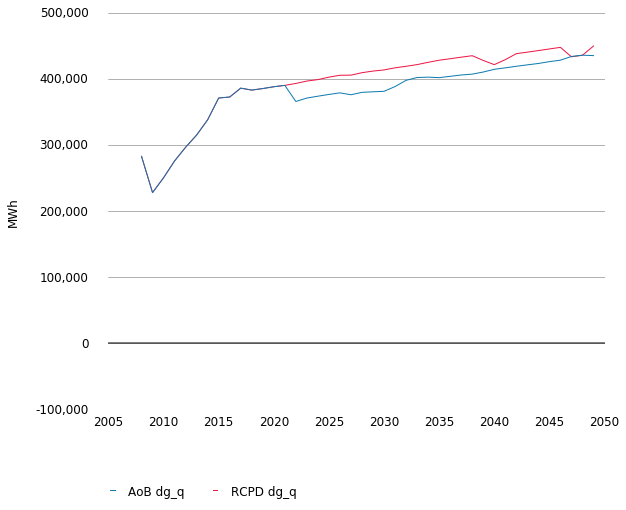

In [60]:
import matplotlib.dates as mdates
plt.rcParams['xtick.major.size'] = 0
ea_p=ea.ea_p
ea_s=ea.ea_s
fig = plt.figure(1,figsize=[cm2inch(25),cm2inch(20)])
ax=fig.add_subplot(111)

lns1=ax.plot(Chartdata.index, Chartdata.RCPD, label= 'RCPD dg_q', lw=1, marker='None', color=ea_p['rd1'])

lns2=ax.plot(Chartdata.index, Chartdata.AoB, label= 'AoB dg_q', lw=1, marker='None', color=ea_p['bl1'])




fig.subplots_adjust(left=0.15)
fig.subplots_adjust(right=0.85)
fig.subplots_adjust(bottom=0.2)

ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')


ax.set_axisbelow(True)
ax.set_frame_on(False)
ax.xaxis.tick_bottom()

#ax.axhline(45,  lw=1, alpha=0.5, color='k')
ax.axhline(0,  lw=2, alpha=0.5, color='k')
ax.set_ylabel(r"MWh", fontsize=12,  family='arial', labelpad=15)

def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter
ax.yaxis.set_major_formatter(y_format) 

# months   = mdates.MonthLocator(bymonthday=19, interval =1)
# months2   = mdates.MonthLocator(bymonthday=1)
# yearsFmt = mdates.DateFormatter('%b')

# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months2)

plt.setp(ax.get_yticklabels(),  fontsize=12)
plt.setp(ax.get_xticklabels(),  fontsize=12, rotation=0)
#plt.setp(ax2.get_yticklabels(),  fontsize=12)
lns = lns2+lns1
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-0.025, -0.25),fancybox=False, shadow=False, frameon=False ,ncol=4, fontsize=12)
pylab.savefig(path +'pics/TPM/TPMpic21.png', dpi=300, transparent=True)

In [61]:
Chartdata=RCPD.groupby(level=[0]).sum()[['pk_q']].copy()
Chartdata['AoB']=AoB.groupby(level=[0]).sum()[['pk_q']]
Chartdata=Chartdata.rename(index=str, columns={"pk_q": "RCPD"})
Chartdata['pk_Diff']=Chartdata.RCPD-Chartdata.AoB
chartdata['pk_Diff']=Chartdata.pk_Diff
Chartdata.head()
print( Chartdata['pk_Diff'].sum())

-14653657.86390608


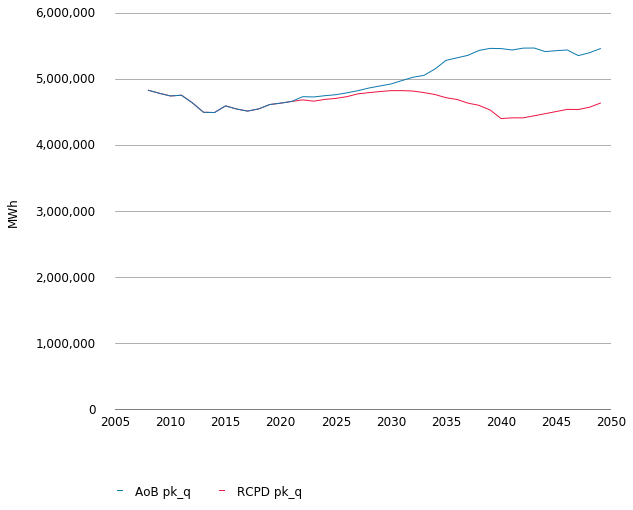

In [62]:
import matplotlib.dates as mdates
plt.rcParams['xtick.major.size'] = 0
ea_p=ea.ea_p
ea_s=ea.ea_s
fig = plt.figure(1,figsize=[cm2inch(25),cm2inch(20)])
ax=fig.add_subplot(111)

lns1=ax.plot(Chartdata.index, Chartdata.RCPD, label= 'RCPD pk_q', lw=1, marker='None', color=ea_p['rd1'])

lns2=ax.plot(Chartdata.index, Chartdata.AoB, label= 'AoB pk_q', lw=1, marker='None', color=ea_p['bl1'])




fig.subplots_adjust(left=0.15)
fig.subplots_adjust(right=0.85)
fig.subplots_adjust(bottom=0.2)

ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')


ax.set_axisbelow(True)
ax.set_frame_on(False)
ax.xaxis.tick_bottom()

#ax.axhline(45,  lw=1, alpha=0.5, color='k')
ax.axhline(0,  lw=2, alpha=0.5, color='k')
ax.set_ylabel(r"MWh", fontsize=12,  family='arial', labelpad=15)

def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter
ax.yaxis.set_major_formatter(y_format) 

# months   = mdates.MonthLocator(bymonthday=19, interval =1)
# months2   = mdates.MonthLocator(bymonthday=1)
# yearsFmt = mdates.DateFormatter('%b')

# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months2)

plt.setp(ax.get_yticklabels(),  fontsize=12)
plt.setp(ax.get_xticklabels(),  fontsize=12, rotation=0)
#plt.setp(ax2.get_yticklabels(),  fontsize=12)
lns = lns2+lns1
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-0.025, -0.25),fancybox=False, shadow=False, frameon=False ,ncol=4, fontsize=12)
pylab.savefig(path +'pics/TPM/TPMpic22.png', dpi=300, transparent=True)

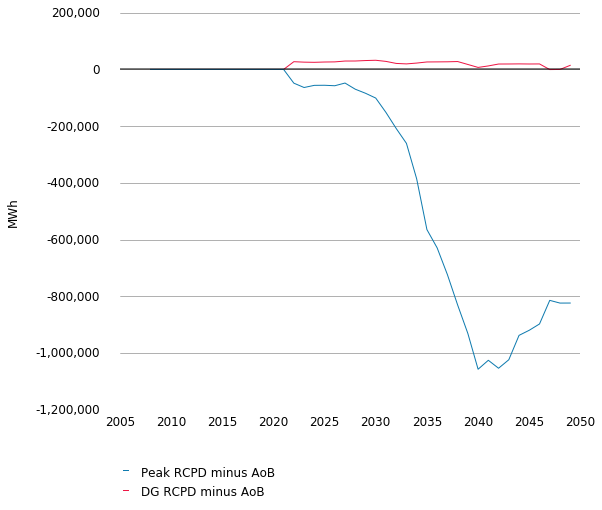

In [63]:
import matplotlib.dates as mdates
plt.rcParams['xtick.major.size'] = 0
ea_p=ea.ea_p
ea_s=ea.ea_s
fig = plt.figure(1,figsize=[cm2inch(25),cm2inch(20)])
ax=fig.add_subplot(111)

lns1=ax.plot(chartdata.index, chartdata.dg_Diff, label= 'DG RCPD minus AoB', lw=1, marker='None', color=ea_p['rd1'])

lns2=ax.plot(chartdata.index, chartdata.pk_Diff, label= 'Peak RCPD minus AoB', lw=1, marker='None', color=ea_p['bl1'])




fig.subplots_adjust(left=0.2)
fig.subplots_adjust(right=0.85)
fig.subplots_adjust(bottom=0.2)

ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')


ax.set_axisbelow(True)
ax.set_frame_on(False)
ax.xaxis.tick_bottom()

#ax.axhline(45,  lw=1, alpha=0.5, color='k')
ax.axhline(0,  lw=2, alpha=0.5, color='k')
ax.set_ylabel(r"MWh", fontsize=12,  family='arial', labelpad=15)

def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter
ax.yaxis.set_major_formatter(y_format) 

# months   = mdates.MonthLocator(bymonthday=19, interval =1)
# months2   = mdates.MonthLocator(bymonthday=1)
# yearsFmt = mdates.DateFormatter('%b')

# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months2)

plt.setp(ax.get_yticklabels(),  fontsize=12)
plt.setp(ax.get_xticklabels(),  fontsize=12, rotation=0)
#plt.setp(ax2.get_yticklabels(),  fontsize=12)
lns = lns2+lns1
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-0.025, -0.25),fancybox=False, shadow=False, frameon=False ,ncol=1, fontsize=12)
pylab.savefig(path +'pics/TPM/TPMpic23.png', dpi=300, transparent=True)

In [64]:
groupedRCPD.head()


Unnamed: 0  existing  available         srmc  lrmc    pk_mw  dg_mw     sh_mw     off_mw  capex
m_yr fuel                                                                                                   
2016 Geo             242         8          0     6.474048   0.0   747.00      0   747.000   747.0000    0.0
     hydro           205        13          0    11.945659   0.0  4853.65      0  4368.285  2557.5000    0.0
     thermal         171        12          0  1082.545873   0.0  1728.60      0  1555.740   972.4500    0.0
     wind             12         3          0     9.616362   0.0    65.48      0    58.932   128.9956    0.0
2017 Geo             530         8          0     9.931036   0.0   747.00      0   747.000   747.0000    0.0

In [65]:
RCPD['total_output']=RCPD.pk_q+((RCPD.dg_q)*0.1)+RCPD.sh_q+RCPD.off_q
regroupedRCPD=RCPD.groupby(level=[0]).sum()

AoB['total_output']=AoB.pk_q+((AoB.dg_q)*0.1)+AoB.sh_q+AoB.off_q
regroupedAoB=AoB.groupby(level=[0]).sum()

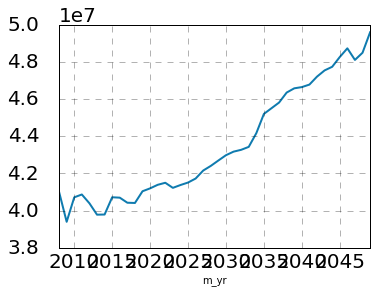

In [66]:
regroupedAoB.total_output.plot()

In [67]:
REGdata=pandas.concat([RCPD.groupby(level=[0]).sum()[['total_output']], AoB.groupby(level=[0]).sum()[['total_output']]], axis=1, keys=['RCPD', 'AoB'])

import statsmodels.api as sm
import statsmodels.formula.api as smf
results = smf.ols('AoB~ RCPD', data=REGdata).fit()
print (results.summary())
para=results.params

f = open('pics/TPM/reg7.csv','w')
f.write(results.summary().as_csv())
f.close()

                            OLS Regression Results                            
Dep. Variable:                    AoB   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     4532.
Date:                Tue, 09 Jul 2019   Prob (F-statistic):           8.68e-43
Time:                        14:05:31   Log-Likelihood:                -586.70
No. Observations:                  42   AIC:                             1177.
Df Residuals:                      40   BIC:                             1181.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.829e+06    6.9e+05     -4.101      0.0

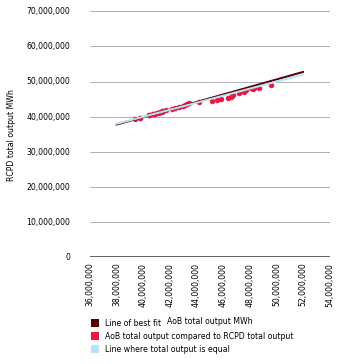

In [68]:
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
matplotlib.pyplot.scatter(regroupedAoB.total_output,regroupedRCPD.total_output, edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
# ax.set_xlim(36000000,6000000)
ax.set_ylim(0,70000000)
ax.axhline(0, color='k', lw=2, alpha=0.6)
x = np.linspace(*ax.get_xlim())
y=para[0]+para[1]*x
#y=para[0]*np.log(x)
ax.plot(x, y, color=(ea_p['br1']))
ax.plot(x, x, color=(ea_p['bl2']))

ax.set_xlabel(r"AoB total output MWh", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_ylabel(r"RCPD total output MWh", fontsize=7.8,  family='arial' , labelpad=10)


setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

p = Rectangle((0, 0), 1, 1, fc=ea_p['br1'], ec='none')
q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
r = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')

ax.legend([p,q,r],['Line of best fit','AoB total output compared to RCPD total output','Line where total output is equal'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)

pylab.savefig(path +'pics/TPM/TPMpic24.png', dpi=300, transparent=True)

In [69]:
Chartdata=RCPD.groupby(level=[0]).sum()[['pk_q']].copy()
Chartdata['AoB']=AoB.groupby(level=[0]).sum()[['pk_q']]
Chartdata=Chartdata.rename(index=str, columns={"pk_q": "RCPD"})
Chartdata['pk_Diff']=Chartdata.RCPD-Chartdata.AoB
chartdata['pk_Diff']=Chartdata.pk_Diff
Chartdata.head()

RCPD          AoB  pk_Diff
m_yr                                     
2008.0  4827744.252  4827744.252      0.0
2009.0  4781931.383  4781931.383      0.0
2010.0  4741764.959  4741764.959      0.0
2011.0  4752964.725  4752964.725      0.0
2012.0  4636441.846  4636441.846      0.0

In [70]:
Chartdata=RCPD.groupby(level=[0]).sum()[['pk_q','dg_q']]
Chartdata=Chartdata.rename(index=str, columns={"pk_q": "RCPD_pk_q","dg_q": "RCPD_dg_q" })


In [71]:
Chartdata['AoB_pk_q']=AoB.groupby(level=[0]).sum()[['pk_q']]
Chartdata['AoB_dg_q']=AoB.groupby(level=[0]).sum()[['dg_q']]

Chartdata['AoB_TotalPeak']=Chartdata['AoB_pk_q']+Chartdata['AoB_dg_q']
Chartdata['RCPD_TotalPeak']=Chartdata['RCPD_pk_q']+Chartdata['RCPD_dg_q']

Chartdata['Difference_at_peak']=Chartdata['AoB_TotalPeak']-Chartdata['RCPD_TotalPeak']

In [72]:
Chartdata.head()


RCPD_pk_q    RCPD_dg_q     AoB_pk_q     AoB_dg_q  AoB_TotalPeak  RCPD_TotalPeak  Difference_at_peak
m_yr                                                                                                         
2008.0  4827744.252  282869.1125  4827744.252  282869.1125   5.110613e+06    5.110613e+06                 0.0
2009.0  4781931.383  228048.0210  4781931.383  228048.0210   5.009979e+06    5.009979e+06                 0.0
2010.0  4741764.959  250531.4680  4741764.959  250531.4680   4.992296e+06    4.992296e+06                 0.0
2011.0  4752964.725  275946.6020  4752964.725  275946.6020   5.028911e+06    5.028911e+06                 0.0
2012.0  4636441.846  296628.2360  4636441.846  296628.2360   4.933070e+06    4.933070e+06                 0.0

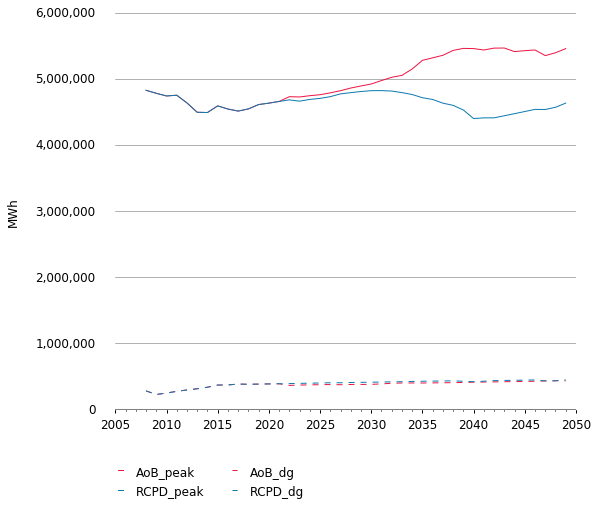

In [73]:
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 1
plt.rcParams['xtick.minor.width'] = 1
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
#plt.rcParams['xtick.major.size'] = 0
ea_p=ea.ea_p
ea_s=ea.ea_s
fig = plt.figure(1,figsize=[cm2inch(25),cm2inch(20)])
ax=fig.add_subplot(111)

lns1=ax.plot(Chartdata.index, Chartdata.AoB_pk_q, label= 'AoB_peak', lw=1, marker='None', color=ea_p['rd1'])

lns2=ax.plot(Chartdata.index, Chartdata.RCPD_pk_q, label= 'RCPD_peak', lw=1, marker='None', color=ea_p['bl1'])

lns3=ax.plot(Chartdata.index, Chartdata.AoB_dg_q, label= 'AoB_dg', lw=1, marker='None', color=ea_p['rd1'], ls='--')

lns4=ax.plot(Chartdata.index, Chartdata.RCPD_dg_q, label= 'RCPD_dg', lw=1, marker='None', color=ea_p['bl1'], ls='--')




fig.subplots_adjust(left=0.2)
fig.subplots_adjust(right=0.85)
fig.subplots_adjust(bottom=0.2)

ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')


ax.set_axisbelow(True)
ax.set_frame_on(False)
ax.xaxis.tick_bottom()

#ax.axhline(45,  lw=1, alpha=0.5, color='k')
ax.axhline(0,  lw=2, alpha=0.5, color='k')
ax.set_ylabel(r"MWh", fontsize=12,  family='arial', labelpad=15)

def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter
ax.yaxis.set_major_formatter(y_format) 

#ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(MultipleLocator(1))
# years    = mdates.YearLocator(1, month=7, day=1) #label at end June
# months   = mdates.MonthLocator(bymonth=1, bymonthday=1)  # Tick at January
# yearsFmt = mdates.DateFormatter('%Y')
# ax.xaxis.set_major_locator(years)  
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months)

plt.setp(ax.get_yticklabels(),  fontsize=12)
plt.setp(ax.get_xticklabels(),  fontsize=12, rotation=0)
#plt.setp(ax2.get_yticklabels(),  fontsize=12)
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-0.025, -0.25),fancybox=False, shadow=False, frameon=False ,ncol=2, fontsize=12)
pylab.savefig(path +'pics/TPM/TPMpic25.png', dpi=300, transparent=True)

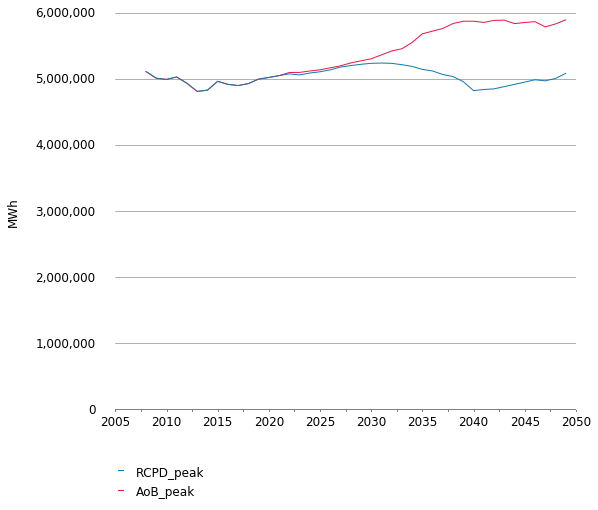

In [74]:
import matplotlib.dates as mdates
plt.rcParams['xtick.major.size'] = 0
ea_p=ea.ea_p
ea_s=ea.ea_s
fig = plt.figure(1,figsize=[cm2inch(25),cm2inch(20)])
ax=fig.add_subplot(111)

lns1=ax.plot(Chartdata.index, Chartdata.AoB_TotalPeak, label= 'AoB_peak', lw=1, marker='None', color=ea_p['rd1'])

lns2=ax.plot(Chartdata.index, Chartdata.RCPD_TotalPeak, label= 'RCPD_peak', lw=1, marker='None', color=ea_p['bl1'])




fig.subplots_adjust(left=0.2)
fig.subplots_adjust(right=0.85)
fig.subplots_adjust(bottom=0.2)

ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')


ax.set_axisbelow(True)
ax.set_frame_on(False)
ax.xaxis.tick_bottom()

#ax.axhline(45,  lw=1, alpha=0.5, color='k')
ax.axhline(0,  lw=2, alpha=0.5, color='k')
ax.set_ylabel(r"MWh", fontsize=12,  family='arial', labelpad=15)

def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter
ax.yaxis.set_major_formatter(y_format) 

# months   = mdates.MonthLocator(bymonthday=19, interval =1)
# months2   = mdates.MonthLocator(bymonthday=1)
# yearsFmt = mdates.DateFormatter('%b')
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 1
plt.rcParams['xtick.minor.width'] = 1
ax.xaxis.set_minor_locator(MultipleLocator(2.5))
# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months2)

plt.setp(ax.get_yticklabels(),  fontsize=12)
plt.setp(ax.get_xticklabels(),  fontsize=12, rotation=0)
#plt.setp(ax2.get_yticklabels(),  fontsize=12)
lns = lns2+lns1
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-0.025, -0.25),fancybox=False, shadow=False, frameon=False ,ncol=1, fontsize=12)
pylab.savefig(path +'pics/TPM/TPMpic26.png', dpi=300, transparent=True)

In [75]:
REGdata=pandas.concat([RCPD.groupby(level=[0]).sum()[['total_output']], AoB.groupby(level=[0]).sum()[['total_output']]], axis=1, keys=['RCPD', 'AoB'])

import statsmodels.api as sm
import statsmodels.formula.api as smf
results = smf.ols('RCPD_TotalPeak~ AoB_TotalPeak', data=Chartdata).fit()
print (results.summary())
para=results.params

f = open('pics/TPM/reg8.csv','w')
f.write(results.summary().as_csv())
f.close()

                            OLS Regression Results                            
Dep. Variable:         RCPD_TotalPeak   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                   0.05215
Date:                Tue, 09 Jul 2019   Prob (F-statistic):              0.821
Time:                        14:05:32   Log-Likelihood:                -551.96
No. Observations:                  42   AIC:                             1108.
Df Residuals:                      40   BIC:                             1111.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.094e+06   2.77e+05     18.395

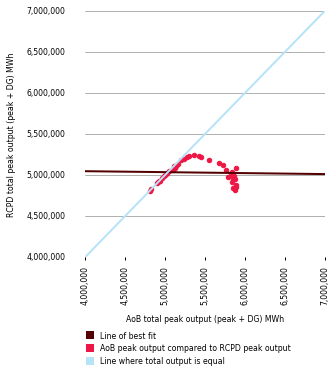

In [76]:
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
matplotlib.pyplot.scatter(Chartdata.AoB_TotalPeak,Chartdata.RCPD_TotalPeak, edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
ax.set_xlim(4000000,7000000)
ax.set_ylim(4000000,7000000)
ax.axhline(0, color='k', lw=2, alpha=0.6)
x = np.linspace(*ax.get_xlim())
y=para[0]+para[1]*x
#y=para[0]*np.log(x)
ax.plot(x, y, color=(ea_p['br1']))
ax.plot(x, x, color=(ea_p['bl2']))

ax.set_xlabel(r"AoB total peak output (peak + DG) MWh", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_ylabel(r"RCPD total peak output (peak + DG) MWh", fontsize=7.8,  family='arial' , labelpad=10)


setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

p = Rectangle((0, 0), 1, 1, fc=ea_p['br1'], ec='none')
q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
r = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')

ax.legend([p,q,r],['Line of best fit','AoB peak output compared to RCPD peak output','Line where total output is equal'],loc=3, 
          bbox_to_anchor=(-0.025, -0.47),ncol=1, fontsize=7.8, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic27.png', dpi=300, transparent=True)

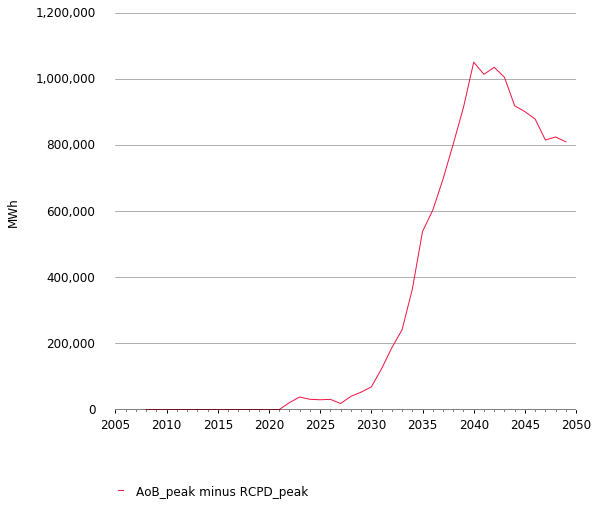

In [77]:
import matplotlib.dates as mdates
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 1
plt.rcParams['xtick.minor.width'] = 1
ea_p=ea.ea_p
ea_s=ea.ea_s
fig = plt.figure(1,figsize=[cm2inch(25),cm2inch(20)])
ax=fig.add_subplot(111)

lns1=ax.plot(Chartdata.index, Chartdata.Difference_at_peak, label= 'AoB_peak minus RCPD_peak', lw=1, marker='None', color=ea_p['rd1'])

#lns2=ax.plot(Chartdata.index, Chartdata.RCPD_TotalPeak, label= 'RCPD_peak', lw=1, marker='None', color=ea_p['bl1'])




fig.subplots_adjust(left=0.2)
fig.subplots_adjust(right=0.85)
fig.subplots_adjust(bottom=0.2)

ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')


ax.set_axisbelow(True)
ax.set_frame_on(False)
ax.xaxis.tick_bottom()

#ax.axhline(45,  lw=1, alpha=0.5, color='k')
ax.axhline(0,  lw=2, alpha=0.5, color='k')
ax.set_ylabel(r"MWh", fontsize=12,  family='arial', labelpad=15)

def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter
ax.yaxis.set_major_formatter(y_format) 

# months   = mdates.MonthLocator(bymonthday=19, interval =1)
# months2   = mdates.MonthLocator(bymonthday=1)
# yearsFmt = mdates.DateFormatter('%b')
ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months2)

plt.setp(ax.get_yticklabels(),  fontsize=12)
plt.setp(ax.get_xticklabels(),  fontsize=12, rotation=0)
#plt.setp(ax2.get_yticklabels(),  fontsize=12)
lns = lns1
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-0.025, -0.25),fancybox=False, shadow=False, frameon=False ,ncol=1, fontsize=12)
pylab.savefig(path +'pics/TPM/TPMpic28.png', dpi=300, transparent=True)

In [78]:
AoBGeneration.head()

Unnamed: 0   bb  type    p_yr    m_yr      pk_s  dg_s      sh_s     off_s        pk_p        dg_p        sh_p       off_p         pk_q  dg_q         sh_q        off_q   exp_per_icp       exp_all  icp  dg_max     earn_icp  dg_icp      pk_pt      dg_pt      sh_pt     off_pt  pk_i  dg_i  sh_i  off_i  pk_ic  dg_ic  sh_ic  off_ic       pk_pg       dg_pg       sh_pg      off_pg       pk_px       dg_px       sh_px      off_px          pk_e  dg_e          sh_e        off_e  pk_pt_mu  dg_pt_mu  sh_pt_mu  off_pt_mu  pk_s_pt_mu  dg_s_pt_mu  sh_s_pt_mu  off_s_pt_mu  pk_ns_pt_mu  dg_ns_pt_mu  sh_ns_pt_mu  off_ns_pt_mu  pk_pt_sd  dg_pt_sd  sh_pt_sd  off_pt_sd  pk_s_pt_sd  dg_s_pt_sd  sh_s_pt_sd  off_s_pt_sd  pk_ns_pt_sd  dg_ns_pt_sd  sh_ns_pt_sd  off_ns_pt_sd  pk_theta  dg_theta  sh_theta  off_theta       srmc  pk_pr  dg_pr  sh_pr  off_pr  pk_rev  dg_rev  sh_rev  off_rev
0           0  HLY   0.0  2010.0  2008.0  0.180993   0.0  0.229458  0.589549  227.286022  227.286022  168.898556  136.374706  1121976.897   0.0  1914136.437  6090902.882  1.408950e+09  1.408950e+09  1.0     0.0  26497.30297    1.62 -38.457390 -38.457390 -22.273466 -17.823501   0.0   0.0   0.0    0.0    0.0    0.0    0.0     0.0  265.743412  265.743412  191.172022  154.198206  227.286022  227.286022  168.898556  136.374706  2.550097e+08   0.0  3.232949e+08  830645088.1  1.067298  1.067298  1.081654   1.072092    1.164163    1.164163    1.134707     1.202785     1.067274     1.067274     1.081621      1.071552  0.158662  0.158662  0.180515   0.212825    0.035904    0.035904    0.016483     0.238784     0.158673     0.158673     0.180566      0.212544  0.000249  0.000249  0.000608   0.004359  73.172167    0.0    0.0    0.0     0.0     0.0     0.0     0.0      0.0
1           1  HLY   0.0  2011.0  2009.0  0.265497   0.0  0.250811  0.483692  124.415054  124.415054   70.230168   45.328450   974616.392   0.0  1631058.522  4873540.191  4.567165e+08  4.567165e+08  1.0     0.0  26306.41809    0.00  17.797794  17.797794   5.336972   3.313550   0.0   0.0   0.0    0.0    0.0    0.0    0.0     0.0  106.617261  106.617261   64.893197   42.014899  124.415054  124.415054   70.230168   45.328450  1.212570e+08   0.0  1.145495e+08  220910021.2  1.067298  1.067298  1.081654   1.072092    1.164163    1.164163    1.134707     1.202785     1.067274     1.067274     1.081621      1.071552  0.158662  0.158662  0.180515   0.212825    0.035904    0.035904    0.016483     0.238784     0.158673     0.158673     0.180566      0.212544  0.000249  0.000249  0.000608   0.004359  73.172167    0.0    0.0    0.0     0.0     0.0     0.0     0.0      0.0
2           2  HLY   0.0  2012.0  2010.0  0.156696   0.0  0.229997  0.613307  101.997249  101.997249   84.117916   72.535909   846532.617   0.0  1506636.856  4659079.944  5.510297e+08  5.510297e+08  1.0     0.0  25430.55031    0.00   6.783980   6.783980   2.723929   0.236686   0.0   0.0   0.0    0.0    0.0    0.0    0.0     0.0   95.213269   95.213269   81.393988   72.299222  101.997249  101.997249   84.117916   72.535909  8.634400e+07   0.0  1.267352e+08  337950597.3  1.067298  1.067298  1.081654   1.072092    1.164163    1.164163    1.134707     1.202785     1.067274     1.067274     1.081621      1.071552  0.158662  0.158662  0.180515   0.212825    0.035904    0.035904    0.016483     0.238784     0.158673     0.158673     0.180566      0.212544  0.000249  0.000249  0.000608   0.004359  73.172167    0.0    0.0    0.0     0.0     0.0     0.0     0.0      0.0
3           3  HLY   0.0  2013.0  2011.0  0.165332   0.0  0.220481  0.614186   95.144030   95.144030   73.055895   65.781010   715499.904   0.0  1242652.302  3844438.997  4.117497e+08  4.117497e+08  1.0     0.0  26097.11657    0.00  -0.472497  -0.472497   5.521523   3.631772   0.0   0.0   0.0    0.0    0.0    0.0    0.0     0.0   95.616527   95.616527   67.534372   62.149237   95.144030   95.144030   73.055895   65.781010  6.807554e+07   0.0  9.078308e+07  252891078.7  1.067298  1.067298  1.081654   1.0720

In [79]:
# AoB=AoB.set_index(['m_yr','bb','type'])
# RCPD=RCPD.set_index(['m_yr','bb','type'])
AoBList=AoBGeneration.columns.tolist()
RCPDList=RCPDGeneration.columns.tolist()

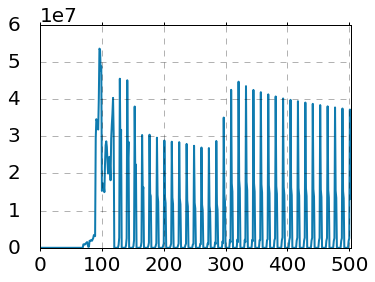

In [80]:
RCPDGeneration.off_rev.plot()

In [81]:
AoB=AoBGeneration[['m_yr','bb','pk_rev','sh_rev','off_rev']]
AoB=AoB.set_index(['m_yr','bb'])
RCPD=RCPDGeneration[['m_yr','bb','pk_rev','sh_rev','off_rev']]
RCPD=RCPD.set_index(['m_yr','bb'])
Alldata=DataFrame.join(AoB, RCPD, sort=True, how='inner', lsuffix='AoB', rsuffix='RCPD')
Alldata['RCPDtotal']=Alldata.pk_revRCPD+Alldata.sh_revRCPD+Alldata.off_revRCPD
Alldata['AoBtotal']=Alldata.pk_revAoB+Alldata.sh_revAoB+Alldata.off_revAoB

#pretty sure this is just SAMI revenue for the HVDC. 
#it somes from rev_q in the main spreadsheet. 

In [82]:
Alldata.sum()

pk_revAoB      4.925755e+08
sh_revAoB      8.780535e+08
off_revAoB     2.511997e+09
pk_revRCPD     6.008325e+08
sh_revRCPD     1.176874e+09
off_revRCPD    3.163847e+09
RCPDtotal      4.941554e+09
AoBtotal       3.882626e+09
dtype: float64

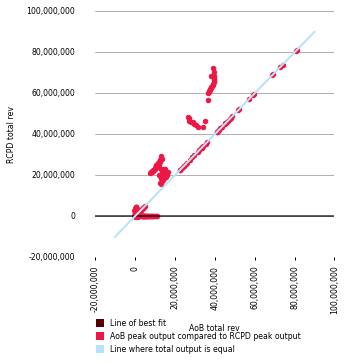

In [83]:
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
matplotlib.pyplot.scatter(Alldata.AoBtotal,Alldata.RCPDtotal, edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
# ax.set_xlim(4000000,7000000)
# ax.set_ylim(4000000,7000000)
ax.axhline(0, color='k', lw=2, alpha=0.6)
x = np.linspace(*ax.get_xlim())
y=para[0]+para[1]*x
#y=para[0]*np.log(x)
#ax.plot(x, y, color=(ea_p['br1']))
ax.plot(x, x, color=(ea_p['bl2']))

ax.set_xlabel(r"AoB total rev", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_ylabel(r"RCPD total rev", fontsize=7.8,  family='arial' , labelpad=10)


setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

p = Rectangle((0, 0), 1, 1, fc=ea_p['br1'], ec='none')
q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
r = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')

ax.legend([p,q,r],['Line of best fit','AoB peak output compared to RCPD peak output','Line where total output is equal'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic29.png', dpi=300, transparent=True)

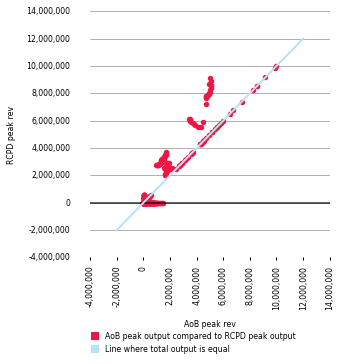

In [84]:
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
matplotlib.pyplot.scatter(Alldata.pk_revAoB,Alldata.pk_revRCPD, edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
# ax.set_xlim(4000000,7000000)
# ax.set_ylim(4000000,7000000)
ax.axhline(0, color='k', lw=2, alpha=0.6)
x = np.linspace(*ax.get_xlim())
y=para[0]+para[1]*x
#y=para[0]*np.log(x)
#ax.plot(x, y, color=(ea_p['br1']))
ax.plot(x, x, color=(ea_p['bl2']))

ax.set_xlabel(r"AoB peak rev", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_ylabel(r"RCPD peak rev", fontsize=7.8,  family='arial' , labelpad=10)


setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

p = Rectangle((0, 0), 1, 1, fc=ea_p['br1'], ec='none')
q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
r = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')

ax.legend([q,r],['AoB peak output compared to RCPD peak output','Line where total output is equal'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic30.png', dpi=300, transparent=True)

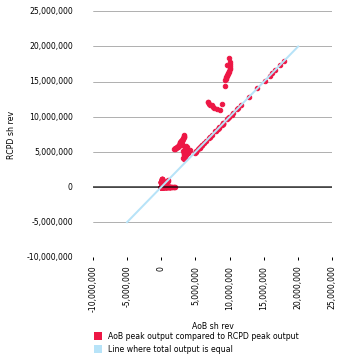

In [85]:
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
matplotlib.pyplot.scatter(Alldata.sh_revAoB,Alldata.sh_revRCPD, edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
# ax.set_xlim(4000000,7000000)
# ax.set_ylim(4000000,7000000)
ax.axhline(0, color='k', lw=2, alpha=0.6)
x = np.linspace(*ax.get_xlim())
y=para[0]+para[1]*x
#y=para[0]*np.log(x)
#ax.plot(x, y, color=(ea_p['br1']))
ax.plot(x, x, color=(ea_p['bl2']))

ax.set_xlabel(r"AoB sh rev", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_ylabel(r"RCPD sh rev", fontsize=7.8,  family='arial' , labelpad=10)


setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

# p = Rectangle((0, 0), 1, 1, fc=ea_p['br1'], ec='none')
q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
r = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')

ax.legend([q,r],['AoB peak output compared to RCPD peak output','Line where total output is equal'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic31.png', dpi=300, transparent=True)

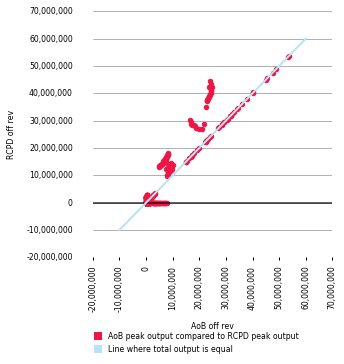

In [86]:
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
matplotlib.pyplot.scatter(Alldata.off_revAoB,Alldata.off_revRCPD, edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
# ax.set_xlim(4000000,7000000)
# ax.set_ylim(4000000,7000000)
ax.axhline(0, color='k', lw=2, alpha=0.6)
x = np.linspace(*ax.get_xlim())
y=para[0]+para[1]*x
#y=para[0]*np.log(x)
#ax.plot(x, y, color=(ea_p['br1']))
ax.plot(x, x, color=(ea_p['bl2']))

ax.set_xlabel(r"AoB off rev", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_ylabel(r"RCPD off rev", fontsize=7.8,  family='arial' , labelpad=10)


setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

# p = Rectangle((0, 0), 1, 1, fc=ea_p['br1'], ec='none')
q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
r = Rectangle((0, 0), 1, 1, fc=ea_p['bl2'], ec='none')

ax.legend([q,r],['AoB peak output compared to RCPD peak output','Line where total output is equal'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic32.png', dpi=300, transparent=True)

In [87]:
AoBList

['Unnamed: 0',
 'bb',
 'type',
 'p_yr',
 'm_yr',
 'pk_s',
 'dg_s',
 'sh_s',
 'off_s',
 'pk_p',
 'dg_p',
 'sh_p',
 'off_p',
 'pk_q',
 'dg_q',
 'sh_q',
 'off_q',
 'exp_per_icp',
 'exp_all',
 'icp',
 'dg_max',
 'earn_icp',
 'dg_icp',
 'pk_pt',
 'dg_pt',
 'sh_pt',
 'off_pt',
 'pk_i',
 'dg_i',
 'sh_i',
 'off_i',
 'pk_ic',
 'dg_ic',
 'sh_ic',
 'off_ic',
 'pk_pg',
 'dg_pg',
 'sh_pg',
 'off_pg',
 'pk_px',
 'dg_px',
 'sh_px',
 'off_px',
 'pk_e',
 'dg_e',
 'sh_e',
 'off_e',
 'pk_pt_mu',
 'dg_pt_mu',
 'sh_pt_mu',
 'off_pt_mu',
 'pk_s_pt_mu',
 'dg_s_pt_mu',
 'sh_s_pt_mu',
 'off_s_pt_mu',
 'pk_ns_pt_mu',
 'dg_ns_pt_mu',
 'sh_ns_pt_mu',
 'off_ns_pt_mu',
 'pk_pt_sd',
 'dg_pt_sd',
 'sh_pt_sd',
 'off_pt_sd',
 'pk_s_pt_sd',
 'dg_s_pt_sd',
 'sh_s_pt_sd',
 'off_s_pt_sd',
 'pk_ns_pt_sd',
 'dg_ns_pt_sd',
 'sh_ns_pt_sd',
 'off_ns_pt_sd',
 'pk_theta',
 'dg_theta',
 'sh_theta',
 'off_theta',
 'srmc',
 'pk_pr',
 'dg_pr',
 'sh_pr',
 'off_pr',
 'pk_rev',
 'dg_rev',
 'sh_rev',
 'off_rev']

In [88]:
# AoB=AoBGeneration[['m_yr','bb','pk_pt','sh_pt','off_pt', 'dg_pt']]
# AoB=AoB.set_index(['m_yr','bb'])
# RCPD=RCPDGeneration[['m_yr','bb','pk_pt','sh_pt','off_pt', 'dg_pt']]
# RCPD=RCPD.set_index(['m_yr','bb'])
# Alldata=DataFrame.join(AoB, RCPD, sort=True, how='inner', lsuffix='AoB', rsuffix='RCPD')
# Alldata['RCPDtotal']=Alldata.pk_revRCPD+Alldata.sh_revRCPD+Alldata.off_revRCPD
# Alldata['AoBtotal']=Alldata.pk_revAoB+Alldata.sh_revAoB+Alldata.off_revAoB

In [89]:
Alldata.sum()

pk_revAoB      4.925755e+08
sh_revAoB      8.780535e+08
off_revAoB     2.511997e+09
pk_revRCPD     6.008325e+08
sh_revRCPD     1.176874e+09
off_revRCPD    3.163847e+09
RCPDtotal      4.941554e+09
AoBtotal       3.882626e+09
dtype: float64

In [90]:
Alldata.head()
Alldatagrouped=Alldata.groupby(level=[0]).sum()
Alldatagrouped.head()

pk_revAoB     sh_revAoB    off_revAoB    pk_revRCPD    sh_revRCPD   off_revRCPD     RCPDtotal      AoBtotal
m_yr                                                                                                                  
2008.0  1.142394e+07  2.190835e+07  6.748979e+07  1.142394e+07  2.190835e+07  6.748979e+07  1.008221e+08  1.008221e+08
2009.0  1.189913e+07  2.174839e+07  7.698078e+07  1.189913e+07  2.174839e+07  7.698078e+07  1.106283e+08  1.106283e+08
2010.0  1.297882e+07  2.391817e+07  7.873702e+07  1.297882e+07  2.391817e+07  7.873702e+07  1.156340e+08  1.156340e+08
2011.0  1.175467e+07  2.193227e+07  7.437864e+07  1.175467e+07  2.193227e+07  7.437864e+07  1.080656e+08  1.080656e+08
2012.0  1.148197e+07  2.179407e+07  6.801452e+07  1.148197e+07  2.179407e+07  6.801452e+07  1.012906e+08  1.012906e+08

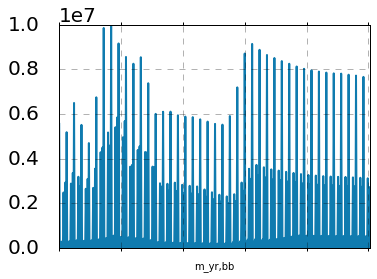

In [91]:
Alldata.pk_revRCPD.plot()

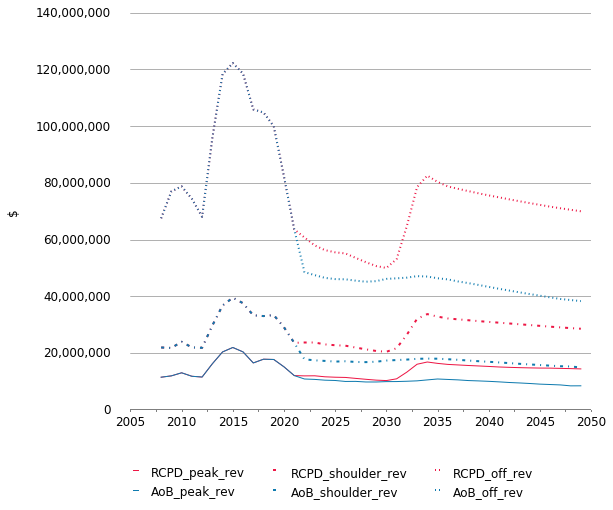

In [92]:
import matplotlib.dates as mdates
plt.rcParams['xtick.major.size'] = 0
ea_p=ea.ea_p
ea_s=ea.ea_s
fig = plt.figure(1,figsize=[cm2inch(25),cm2inch(20)])
ax=fig.add_subplot(111)

lns1=ax.plot(Alldatagrouped.index, Alldatagrouped.pk_revRCPD, label= 'RCPD_peak_rev', lw=1, marker='None', color=ea_p['rd1'])
lns2=ax.plot(Alldatagrouped.index, Alldatagrouped.pk_revAoB, label= 'AoB_peak_rev', lw=1, marker='None', color=ea_p['bl1'])

lns3=ax.plot(Alldatagrouped.index, Alldatagrouped.sh_revRCPD, label= 'RCPD_shoulder_rev', lw=2, marker='None',ls='-.', color=ea_p['rd1'])
lns4=ax.plot(Alldatagrouped.index, Alldatagrouped.sh_revAoB, label= 'AoB_shoulder_rev', lw=2, marker='None',ls='-.', color=ea_p['bl1'])

lns5=ax.plot(Alldatagrouped.index, Alldatagrouped.off_revRCPD, label= 'RCPD_off_rev', lw=2, marker='None',ls=':', color=ea_p['rd1'])
lns6=ax.plot(Alldatagrouped.index, Alldatagrouped.off_revAoB, label= 'AoB_off_rev', lw=2, marker='None',ls=':', color=ea_p['bl1'])




fig.subplots_adjust(left=0.2)
fig.subplots_adjust(right=0.85)
fig.subplots_adjust(bottom=0.2)

ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')


ax.set_axisbelow(True)
ax.set_frame_on(False)
ax.xaxis.tick_bottom()

#ax.axhline(45,  lw=1, alpha=0.5, color='k')
ax.axhline(0,  lw=2, alpha=0.5, color='k')
ax.set_ylabel(r"$", fontsize=12,  family='arial', labelpad=15)

def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter
ax.yaxis.set_major_formatter(y_format) 

# months   = mdates.MonthLocator(bymonthday=19, interval =1)
# months2   = mdates.MonthLocator(bymonthday=1)
# yearsFmt = mdates.DateFormatter('%b')
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 1
plt.rcParams['xtick.minor.width'] = 1
ax.xaxis.set_minor_locator(MultipleLocator(2.5))
# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months2)

plt.setp(ax.get_yticklabels(),  fontsize=12)
plt.setp(ax.get_xticklabels(),  fontsize=12, rotation=0)
#plt.setp(ax2.get_yticklabels(),  fontsize=12)
lns = lns1+lns2+lns3+lns4+lns5+lns6
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-0.025, -0.25),fancybox=False, shadow=False, frameon=False ,ncol=3, fontsize=12)
pylab.savefig(path +'pics/TPM/TPMpic33.png', dpi=300, transparent=True)

In [93]:
AoB= read_csv('aob.csv',parse_dates=True, na_values='NaN')
RCPD= read_csv('rcpd.csv',parse_dates=True, na_values='NaN')


AoB=AoB[['m_yr','bb','pk_rev','sh_rev','off_rev', 'dg_rev']]
AoB=AoB.set_index(['m_yr','bb'])
RCPD=RCPD[['m_yr','bb','pk_rev','sh_rev','off_rev', 'dg_rev']]
RCPD=RCPD.set_index(['m_yr','bb'])
Alldata=DataFrame.join(AoB, RCPD, sort=True, how='inner', lsuffix='AoB', rsuffix='RCPD')
Alldatagrouped=Alldata.groupby(level=[0]).sum()

In [94]:
Alldata.sum()

pk_revAoB      1.952193e+10
sh_revAoB      8.237223e+09
off_revAoB     2.610595e+10
dg_revAoB      3.095092e+08
pk_revRCPD     5.242914e+10
sh_revRCPD     0.000000e+00
off_revRCPD    0.000000e+00
dg_revRCPD     0.000000e+00
dtype: float64

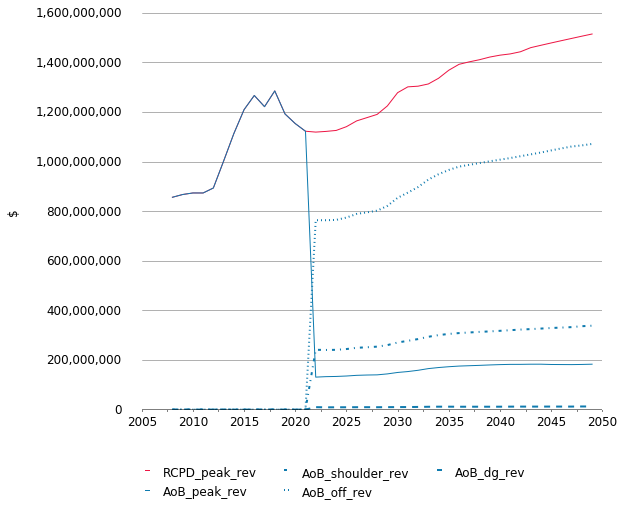

In [95]:
import matplotlib.dates as mdates
plt.rcParams['xtick.major.size'] = 0
ea_p=ea.ea_p
ea_s=ea.ea_s
fig = plt.figure(1,figsize=[cm2inch(25),cm2inch(20)])
ax=fig.add_subplot(111)

lns1=ax.plot(Alldatagrouped.index, Alldatagrouped.pk_revRCPD, label= 'RCPD_peak_rev', lw=1, marker='None', color=ea_p['rd1'])
lns2=ax.plot(Alldatagrouped.index, Alldatagrouped.pk_revAoB, label= 'AoB_peak_rev', lw=1, marker='None', color=ea_p['bl1'])

#lns3=ax.plot(Alldatagrouped.index, Alldatagrouped.sh_revRCPD, label= 'RCPD_shoulder_rev', lw=2, marker='None',ls='-.', color=ea_p['rd1'])
lns4=ax.plot(Alldatagrouped.index, Alldatagrouped.sh_revAoB, label= 'AoB_shoulder_rev', lw=2, marker='None',ls='-.', color=ea_p['bl1'])

#lns5=ax.plot(Alldatagrouped.index, Alldatagrouped.off_revRCPD, label= 'RCPD_off_rev', lw=2, marker='None',ls=':', color=ea_p['rd1'])
lns6=ax.plot(Alldatagrouped.index, Alldatagrouped.off_revAoB, label= 'AoB_off_rev', lw=2, marker='None',ls=':', color=ea_p['bl1'])

#lns7=ax.plot(Alldatagrouped.index, Alldatagrouped.dg_revRCPD, label= 'RCPD_dg_rev', lw=2, marker='None',ls='--', color=ea_p['rd1'])
lns8=ax.plot(Alldatagrouped.index, Alldatagrouped.dg_revAoB, label= 'AoB_dg_rev', lw=2, marker='None',ls='--', color=ea_p['bl1'])



fig.subplots_adjust(left=0.2)
fig.subplots_adjust(right=0.85)
fig.subplots_adjust(bottom=0.2)

ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')


ax.set_axisbelow(True)
ax.set_frame_on(False)
ax.xaxis.tick_bottom()

#ax.axhline(45,  lw=1, alpha=0.5, color='k')
ax.axhline(0,  lw=2, alpha=0.5, color='k')
ax.set_ylabel(r"$", fontsize=12,  family='arial', labelpad=15)

def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter
ax.yaxis.set_major_formatter(y_format) 

# months   = mdates.MonthLocator(bymonthday=19, interval =1)
# months2   = mdates.MonthLocator(bymonthday=1)
# yearsFmt = mdates.DateFormatter('%b')
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 1
plt.rcParams['xtick.minor.width'] = 1
ax.xaxis.set_minor_locator(MultipleLocator(2.5))
# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months2)

plt.setp(ax.get_yticklabels(),  fontsize=12)
plt.setp(ax.get_xticklabels(),  fontsize=12, rotation=0)
#plt.setp(ax2.get_yticklabels(),  fontsize=12)
lns = lns1+lns2+lns4+lns6+lns8
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-0.025, -0.25),fancybox=False, shadow=False, frameon=False ,ncol=3, fontsize=12)
pylab.savefig(path +'pics/TPM/TPMpic34.png', dpi=300, transparent=True)

In [96]:
AoB= read_csv('aob.csv',parse_dates=True, na_values='NaN')
RCPD= read_csv('rcpd.csv',parse_dates=True, na_values='NaN')

AoB=AoB.set_index(['m_yr','bb','type'])
RCPD=RCPD.set_index(['m_yr','bb','type'])

                            OLS Regression Results                            
Dep. Variable:                     TQ   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     241.3
Date:                Tue, 09 Jul 2019   Prob (F-statistic):           1.85e-16
Time:                        14:05:36   Log-Likelihood:                -517.28
No. Observations:                  34   AIC:                             1039.
Df Residuals:                      32   BIC:                             1042.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.034e+07   3.52e+06     -2.941      0.0

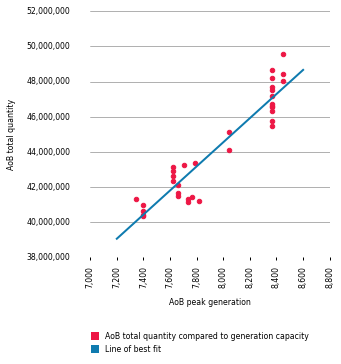

In [97]:
xx=AoB.groupby(level=[0])[['pk_q','sh_q','off_q']].sum().tail(34)

regdata=DataFrame(xx.sum(axis=1))
yy=groupedAoB['pk_mw'].unstack(level=1).sum(axis=1).head(34)
regdata.columns=['TQ']
regdata['G']=yy

results = smf.ols('TQ ~ G', data=regdata).fit()

print (results.summary())
para=results.params

f = open('pics/TPM/reg9.csv','w')
f.write(results.summary().as_csv())
f.close()

import matplotlib.patches as mpatches
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
matplotlib.pyplot.scatter(regdata.G, regdata.TQ, edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
# ax.set_xlim(4000000,6000000)
# ax.set_ylim(4000000,6000000)
# ax.axhline(0, color='k', lw=2, alpha=0.6)
x = np.linspace(*ax.get_xlim())
y=para[0]+para[1]*x
# y=x*para[0]
ax.plot(x, y, color=(ea_p['bl1']))
#ax.plot(x, x, color=(ea_p['bl2']))


ax.set_xlabel(r"AoB peak generation", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_ylabel(r"AoB total quantity", fontsize=7.8,  family='arial' , labelpad=10)

setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
#p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
r = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')

ax.legend([q,r],['AoB total quantity compared to generation capacity','Line of best fit'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic35.png', dpi=300, transparent=True)

In [98]:
xx=AoB.groupby(level=[0])[['pk_q','sh_q','off_q']].sum().tail(34)
yy=groupedAoB['pk_mw'].unstack(level=1).sum(axis=1).head(34)
regdata=DataFrame(xx.sum(axis=1))
regdata.columns=['TQ']
regdata['G']=yy

results = smf.ols('TQ ~ G', data=regdata).fit()
print (results.summary())
para=results.params

f = open('pics/TPM/reg10.csv','w')
f.write(results.summary().as_csv())
f.close()

                            OLS Regression Results                            
Dep. Variable:                     TQ   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     241.3
Date:                Tue, 09 Jul 2019   Prob (F-statistic):           1.85e-16
Time:                        14:05:36   Log-Likelihood:                -517.28
No. Observations:                  34   AIC:                             1039.
Df Residuals:                      32   BIC:                             1042.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.034e+07   3.52e+06     -2.941      0.0

In [99]:
para[1]/(365*24)

0.7832884569667493

                            OLS Regression Results                            
Dep. Variable:                     TQ   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     258.8
Date:                Tue, 09 Jul 2019   Prob (F-statistic):           6.84e-17
Time:                        14:05:36   Log-Likelihood:                -443.65
No. Observations:                  34   AIC:                             891.3
Df Residuals:                      32   BIC:                             894.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.419e+06   4.03e+05     -3.517      0.0

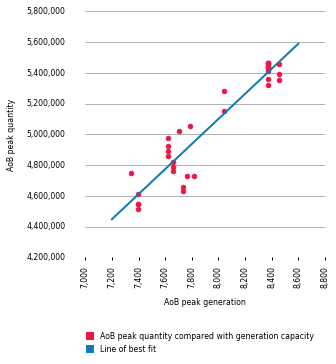

In [100]:
xx=AoB.groupby(level=[0])[['pk_q']].sum().tail(34)

regdata=DataFrame(xx.sum(axis=1))
yy=groupedAoB['pk_mw'].unstack(level=1).sum(axis=1).head(34)
regdata.columns=['TQ']
regdata['G']=yy

results = smf.ols('TQ ~ G', data=regdata).fit()
print (results.summary())
para=results.params

f = open('pics/TPM/reg11.csv','w')
f.write(results.summary().as_csv())
f.close()

import matplotlib.patches as mpatches
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
matplotlib.pyplot.scatter(regdata.G, regdata.TQ, edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
# ax.set_xlim(4000000,6000000)
# ax.set_ylim(4000000,6000000)
# ax.axhline(0, color='k', lw=2, alpha=0.6)
x = np.linspace(*ax.get_xlim())
y=para[0]+para[1]*x
# y=x*para[0]
ax.plot(x, y, color=(ea_p['bl1']))
#ax.plot(x, x, color=(ea_p['bl2']))


ax.set_xlabel(r"AoB peak generation", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_ylabel(r"AoB peak quantity", fontsize=7.8,  family='arial' , labelpad=10)

setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
#p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
r = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')

ax.legend([q,r],['AoB peak quantity compared with generation capacity','Line of best fit'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic36.png', dpi=300, transparent=True)

In [101]:
1600/(24*365*2)

0.091324200913242

In [102]:
para[1]/(24*365)

0.09301908164784517

                            OLS Regression Results                            
Dep. Variable:                     TQ   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     42.45
Date:                Tue, 09 Jul 2019   Prob (F-statistic):           2.46e-07
Time:                        14:05:36   Log-Likelihood:                -536.68
No. Observations:                  34   AIC:                             1077.
Df Residuals:                      32   BIC:                             1080.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.313e+07   1.49e+07     -3.562      0.0

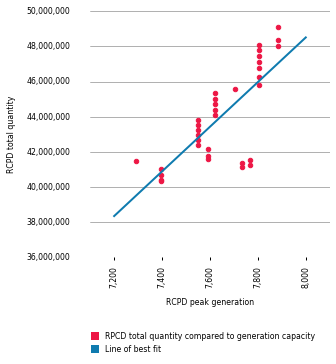

In [103]:
xx=RCPD.groupby(level=[0])[['pk_q','sh_q','off_q']].sum().tail(34)

regdata=DataFrame(xx.sum(axis=1))
yy=groupedRCPD['pk_mw'].unstack(level=1).sum(axis=1).head(34)
regdata.columns=['TQ']
regdata['G']=yy

results = smf.ols('TQ ~ G', data=regdata).fit()
print (results.summary())
para=results.params

f = open('pics/TPM/reg12.csv','w')
f.write(results.summary().as_csv())
f.close()

import matplotlib.patches as mpatches
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
matplotlib.pyplot.scatter(regdata.G, regdata.TQ, edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
# ax.set_xlim(4000000,6000000)
# ax.set_ylim(4000000,6000000)
# ax.axhline(0, color='k', lw=2, alpha=0.6)
x = np.linspace(*ax.get_xlim())
y=para[0]+para[1]*x
# y=x*para[0]
ax.plot(x, y, color=(ea_p['bl1']))
#ax.plot(x, x, color=(ea_p['bl2']))


ax.set_xlabel(r"RCPD peak generation", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_ylabel(r"RCPD total quantity", fontsize=7.8,  family='arial' , labelpad=10)

setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
#p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
r = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')

ax.legend([q,r],['RPCD total quantity compared to generation capacity','Line of best fit'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic37.png', dpi=300, transparent=True)

In [104]:
para[1]/(365*24)

1.4503828511466432

                            OLS Regression Results                            
Dep. Variable:                     TQ   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     7.424
Date:                Tue, 09 Jul 2019   Prob (F-statistic):             0.0103
Time:                        14:05:36   Log-Likelihood:                -444.30
No. Observations:                  34   AIC:                             892.6
Df Residuals:                      32   BIC:                             895.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.316e+06   9.86e+05      7.423      0.0

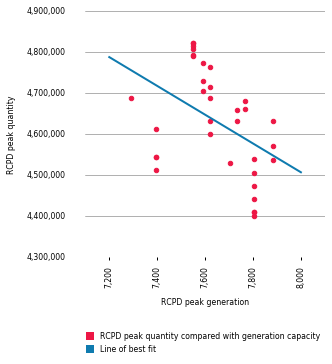

In [105]:
xx=RCPD.groupby(level=[0])[['pk_q']].sum().tail(34)

regdata=DataFrame(xx.sum(axis=1))
yy=groupedRCPD['pk_mw'].unstack(level=1).sum(axis=1).head(34)
regdata.columns=['TQ']
regdata['G']=yy

results = smf.ols('TQ ~ G', data=regdata).fit()
print (results.summary())
para=results.params

f = open('pics/TPM/reg13.csv','w')
f.write(results.summary().as_csv())
f.close()

import matplotlib.patches as mpatches
fig = plt.figure(23,figsize=[cm2inch(13),cm2inch(14)])
ax=fig.add_subplot(111)
matplotlib.pyplot.scatter(regdata.G, regdata.TQ, edgecolors=(ea_p['rd1']), color=(ea_p['rd1']))
grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
grid(b=False, axis='x')
ax.set_axisbelow(True)
plt.subplots_adjust(bottom=0.28)
plt.subplots_adjust(right=0.9)
plt.subplots_adjust(left=0.25)
def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter

ax.yaxis.set_major_formatter(y_format) 
ax.xaxis.set_major_formatter(y_format) 
ax.set_frame_on(False)

ax.xaxis.tick_bottom()
# ax.set_xlim(4000000,6000000)
# ax.set_ylim(4000000,6000000)
# ax.axhline(0, color='k', lw=2, alpha=0.6)
x = np.linspace(*ax.get_xlim())
y=para[0]+para[1]*x
# y=x*para[0]
ax.plot(x, y, color=(ea_p['bl1']))
#ax.plot(x, x, color=(ea_p['bl2']))


ax.set_xlabel(r"RCPD peak generation", fontsize=7.8,  family='arial' , labelpad=10)
ax.set_ylabel(r"RCPD peak quantity", fontsize=7.8,  family='arial' , labelpad=10)

setp(ax.get_xticklabels(),  rotation =90, fontsize=7.8)
setp(ax.get_yticklabels(),  fontsize=7.8)

q = Rectangle((0, 0), 1, 1, fc=ea_p['rd1'], ec='none')
#p = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')
r = Rectangle((0, 0), 1, 1, fc=ea_p['bl1'], ec='none')

ax.legend([q,r],['RCPD peak quantity compared with generation capacity','Line of best fit'],loc=3, 
          bbox_to_anchor=(-0.025, -0.42),ncol=1, fontsize=7.8, frameon=False)
pylab.savefig(path +'pics/TPM/TPMpic38.png', dpi=300, transparent=True)

In [106]:
para[1]/(365*24)

-0.0400765811099109

In [107]:
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                     TQ   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     7.424
Date:                Tue, 09 Jul 2019   Prob (F-statistic):             0.0103
Time:                        14:05:37   Log-Likelihood:                -444.30
No. Observations:                  34   AIC:                             892.6
Df Residuals:                      32   BIC:                             895.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.316e+06   9.86e+05      7.423      0.0

In [108]:
f = open('csvfile.csv','w')
f.write(results.summary().as_csv())
f.close()

In [109]:
AoB= read_csv('aob.csv',parse_dates=True, na_values='NaN')
RCPD= read_csv('rcpd.csv',parse_dates=True, na_values='NaN')


AoB=AoB[['m_yr','bb','pk_q','sh_q','off_q', 'dg_q']]
AoB=AoB.set_index(['m_yr','bb'])
AoB['Total_AOB']=AoB.sum(axis=1)
RCPD=RCPD[['m_yr','bb','pk_q','sh_q','off_q', 'dg_q']]
RCPD=RCPD.set_index(['m_yr','bb'])
RCPD['Total_RCPD']=RCPD.sum(axis=1)
Alldata=DataFrame.join(AoB, RCPD, sort=True, how='inner', lsuffix='AoB', rsuffix='RCPD')
Alldatagrouped=Alldata.groupby(level=[0]).sum()


In [110]:
Alldatagrouped

pk_qAoB       sh_qAoB      off_qAoB        dg_qAoB     Total_AOB      pk_qRCPD      sh_qRCPD     off_qRCPD       dg_qRCPD    Total_RCPD
m_yr                                                                                                                                                
2008.0  8.388893e+06  1.540602e+07  4.947739e+07  497688.070500  7.376999e+07  8.388893e+06  1.540602e+07  4.947739e+07  497688.070500  7.376999e+07
2009.0  8.417294e+06  1.491797e+07  4.692669e+07  384671.312000  7.064663e+07  8.417294e+06  1.491797e+07  4.692669e+07  384671.312000  7.064663e+07
2010.0  8.406663e+06  1.536121e+07  4.912088e+07  410639.707000  7.329939e+07  8.406663e+06  1.536121e+07  4.912088e+07  410639.707000  7.329939e+07
2011.0  8.421597e+06  1.540997e+07  4.940689e+07  460404.828000  7.369887e+07  8.421597e+06  1.540997e+07  4.940689e+07  460404.828000  7.369887e+07
2012.0  8.271064e+06  1.521577e+07  4.883680e+07  488972.270000  7.281261e+07  8.271064e+06  1.521577e+07  4.883680e+07  488972.270000  7.281261e+07
2013.0  8.021395e+06  1.500965e+07  4.821027e+07  523288.397000  7.176461e+07  8.021395e+06  1.500965e+07  4.821027e+07  523288.397000  7.176461e+07
2014.0  8.017277e+06  1.501487e+07  4.822882e+07  561206.435000  7.182217e+07  8.017277e+06  1.501487e+07  4.822882e+07  561206.435000  7.182217e+07
2015.0  8.225734e+06  1.541456e+07  4.940735e+07  601433.381000  7.364908e+07  8.225734e+06  1.541456e+07  4.940735e+07  601433.381000  7.364908e+07
2016.0  8.148672e+06  1.539735e+07  4.964538e+07  605292.909000  7.379670e+07  8.148672e+06  1.539735e+07  4.964538e+07  605292.909000  7.379670e+07
2017.0  8.107133e+06  1.526570e+07  4.933165e+07  622627.472000  7.332711e+07  8.107133e+06  1.526570e+07  4.933165e+07  622627.472000  7.332711e+07
2018.0  8.166161e+06  1.525640e+07  4.926334e+07  615269.797969  7.330117e+07  8.166161e+06  1.525640e+07  4.926334e+07  615269.797969  7.330117e+07
2019.0  8.295882e+06  1.548998e+07  5.014323e+07  619238.105036  7.454833e+07  8.295882e+06  1.548998e+07  5.014323e+07  619238.105036  7.454833e+07
2020.0  8.337183e+06  1.555370e+07  5.034050e+07  624526.430653  7.485591e+07  8.337183e+06  1.555370e+07  5.034050e+07  624526.430653  7.485591e+07
2021.0  8.386400e+06  1.563633e+07  5.057332e+07  628023.024777  7.522408e+07  8.386400e+06  1.563633e+07  5.057332e+07  628023.024777  7.522408e+07
2022.0  8.516485e+06  1.562926e+07  5.068325e+07  587457.950312  7.541645e+07  8.431315e+06  1.571342e+07  5.081162e+07  633529.487569  7.558988e+07
2023.0  8.503757e+06  1.553542e+07  5.023248e+07  597347.711888  7.486900e+07  8.391415e+06  1.562859e+07  5.040704e+07  640696.705441  7.506774e+07
2024.0  8.540965e+06  1.560740e+07  5.041980e+07  602406.005858  7.517057e+07  8.442103e+06  1.571396e+07  5.063623e+07  644184.689408  7.543647e+07
2025.0  8.571461e+06  1.567510e+07  5.058698e+07  607172.032621  7.544072e+07  8.473113e+06  1.576399e+07  5.078280e+07  650918.660624  7.567081e+07
2026.0  8.624664e+06  1.576475e+07  5.085317e+07  611452.335365  7.585404e+07  8.523289e+06  1.585066e+07  5.105379e+07  656110.343908  7.608385e+07
2027.0  8.686300e+06  1.596005e+07  5.138721e+07  605017.062843  7.663858e+07  8.601686e+06  1.602027e+07  5.148881e+07  655042.563659  7.676581e+07
2028.0  8.761504e+06  1.605485e+07  5.168846e+07  611607.404508  7.711641e+07  8.638472e+06  1.612288e+07  5.180008e+07  662030.977826  7.722347e+07
2029.0  8.820892e+06  1.617682e+07  5.205060e+07  612807.287408  7.766111e+07  8.673286e+06  1.625612e+07  5.215621e+07  666025.199935  7.775164e+07
2030.0  8.877827e+06  1.629713e+07  5.240684e+07  613895.485772  7.819569e+07  8.702395e+06  1.640196e+07  5.253742e+07  668862.008374  7.831064e+07
2031.0  8.973433e+06  1.635507e+07  5.262140e+07  627345.550996  7.857725e+07  8.711221e+06  1.653489e+07  5.289921e+07  674857.745566  7.882018e+07
2032.0  9.065304e+06  1.636443e+07  5.272324e+07  645713.816828  7.879869e+07  8.707630e+06  1.669241e+07  5.329477e+07  678970.977868  7.9

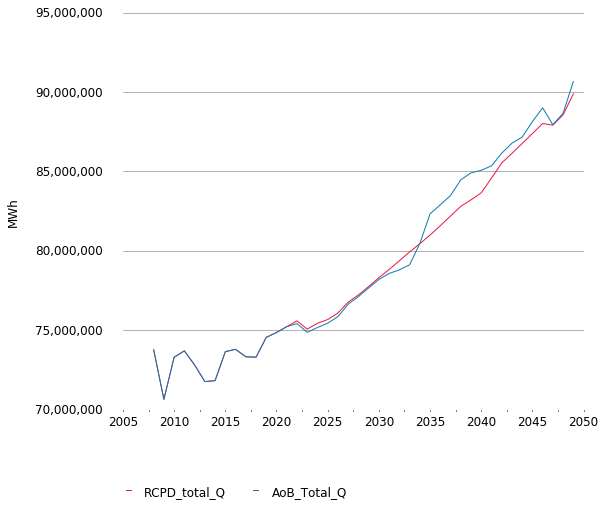

In [111]:
import matplotlib.dates as mdates
plt.rcParams['xtick.major.size'] = 0
ea_p=ea.ea_p
ea_s=ea.ea_s
fig = plt.figure(1,figsize=[cm2inch(25),cm2inch(20)])
ax=fig.add_subplot(111)

lns1=ax.plot(Alldatagrouped.index, Alldatagrouped.Total_RCPD, label= 'RCPD_total_Q', lw=1, marker='None', color=ea_p['rd1'])
lns2=ax.plot(Alldatagrouped.index, Alldatagrouped.Total_AOB, label= 'AoB_Total_Q', lw=1, marker='None', color=ea_p['bl1'])

#lns3=ax.plot(Alldatagrouped.index, Alldatagrouped.sh_revRCPD, label= 'RCPD_shoulder_rev', lw=2, marker='None',ls='-.', color=ea_p['rd1'])
# lns4=ax.plot(Alldatagrouped.index, Alldatagrouped.sh_revAoB, label= 'AoB_shoulder_rev', lw=2, marker='None',ls='-.', color=ea_p['bl1'])

# #lns5=ax.plot(Alldatagrouped.index, Alldatagrouped.off_revRCPD, label= 'RCPD_off_rev', lw=2, marker='None',ls=':', color=ea_p['rd1'])
# lns6=ax.plot(Alldatagrouped.index, Alldatagrouped.off_revAoB, label= 'AoB_off_rev', lw=2, marker='None',ls=':', color=ea_p['bl1'])

# #lns7=ax.plot(Alldatagrouped.index, Alldatagrouped.dg_revRCPD, label= 'RCPD_dg_rev', lw=2, marker='None',ls='--', color=ea_p['rd1'])
# lns8=ax.plot(Alldatagrouped.index, Alldatagrouped.dg_revAoB, label= 'AoB_dg_rev', lw=2, marker='None',ls='--', color=ea_p['bl1'])



fig.subplots_adjust(left=0.2)
fig.subplots_adjust(right=0.85)
fig.subplots_adjust(bottom=0.2)

ax.grid(b=True, which='major', color='k', linestyle='-', axis='y',alpha=0.6, clip_on=True , marker=None )
ax.grid(b=False, axis='x', which='both')


ax.set_axisbelow(True)
ax.set_frame_on(False)
ax.xaxis.tick_bottom()

#ax.axhline(45,  lw=1, alpha=0.5, color='k')
ax.axhline(0,  lw=2, alpha=0.5, color='k')
ax.set_ylabel(r"MWh", fontsize=12,  family='arial', labelpad=15)

def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s
y_format = tkr.FuncFormatter(func)  # make formatter
ax.yaxis.set_major_formatter(y_format) 
ax.set_ylim(70000000,95000000)
# months   = mdates.MonthLocator(bymonthday=19, interval =1)
# months2   = mdates.MonthLocator(bymonthday=1)
# yearsFmt = mdates.DateFormatter('%b')
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 1
plt.rcParams['xtick.minor.width'] = 1
ax.xaxis.set_minor_locator(MultipleLocator(2.5))
# ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months2)

plt.setp(ax.get_yticklabels(),  fontsize=12)
plt.setp(ax.get_xticklabels(),  fontsize=12, rotation=0)
#plt.setp(ax2.get_yticklabels(),  fontsize=12)
lns = lns1+lns2#+lns4+lns6+lns8
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=3, bbox_to_anchor=(-0.025, -0.25),fancybox=False, shadow=False, frameon=False ,ncol=3, fontsize=12)
pylab.savefig(path +'pics/TPM/TPMpic34A.png', dpi=300, transparent=True)

In [112]:
import itertools
yr_l=list(range(2022,2050)) 
reg_l=["MDN","OTA","HLY","TRK","WKM","RDF","SFD",
      "BPE","HAY","KIK","ISL","BEN","ROX","TWI"] 
k=list(itertools.product(yr_l,reg_l))